<a href="https://colab.research.google.com/github/shafiq1805/ML-Cardiovascular-Risk-Prediction/blob/main/Cardiovascular_Risk_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    

##### **Project Type**    - Classification
##### **Contribution**    - Individual/Team
##### **Team Member 1 -** Shafiq Abubacker


# **Project Summary -**

The ongoing cardiovascular study in Framingham, Massachusetts, seeks to predict the 10-year risk of coronary heart disease (CHD) in residents through a dataset comprising over 4,000 records and 15 attributes. This dataset, rich in demographic, behavioral, and medical risk factors, plays a pivotal role in understanding an individual's cardiovascular health. The primary objective is to develop a predictive model aiding healthcare professionals in early CHD risk identification, facilitating timely intervention and personalized healthcare.

**Key Dataset Attributes:**

Demographic and Behavioral Factors: Includes gender, age, smoking status, cigarettes smoked per day, use of blood pressure medications, history of stroke, history of hypertension, diabetes status, cholesterol levels, blood pressure measurements, body mass index (BMI), and heart rate.

**Project Workflow:**

**Data Preprocessing:**

Handle missing values, encode categorical variables (e.g., gender), and normalize or standardize numerical features to ensure dataset quality.

**Exploratory Data Analysis (EDA):**

Conduct EDA to gain insights into variable distributions and relationships.
Identify and address outliers, crucial for model performance.

**Feature Engineering:**

Enhance predictive power through the creation of new features or transformation of existing ones.
Example: Calculate BMI from height and weight for a nuanced obesity measure.

**Model Selection and Training:**

Choose common classification algorithms (e.g., logistic regression, decision trees, random forests).
Split the dataset into training and testing sets for effective evaluation.
Train models on the training set and evaluate on the testing set using metrics like accuracy, precision, recall, and F1 score.

**Interpretability:**

Understand feature contributions for healthcare professionals to grasp key risk factors.
Significance in dealing with patient outcomes, ensuring alignment with existing medical knowledge.

**Final Predictive Model:**

Thoroughly evaluate and potentially fine-tune hyperparameters.
Provides a tool for assessing 10-year CHD risk, stratifying patients based on risk levels for prioritized interventions.
Continuous Validation and Updating:

Essential as new data becomes available.
Collaboration with domain experts and healthcare professionals for continuous refinement and alignment with dynamic cardiovascular health research.

# **GitHub Link -**

https://github.com/shafiq1805/ML-Cardiovascular-Risk-Prediction

# **Problem Statement**


**Challenge:** To develop an accurate predictive model for assessing the 10-year risk of coronary heart disease (CHD) in Framingham residents.

**Data Complexity:** Our Dataset comprises of 15 attributes, including demographic, behavioral, and medical risk factors, such as age, gender, smoking habits, medication use, and health history.

**Objective:** To empower healthcare professionals with a reliable tool to identify residents at heightened CHD risk for targeted interventions and personalized healthcare.

**Key Challenges:**


*   Handling missing data.
*   Preprocessing diverse information types.
*   Ensuring model interpretability for healthcare professionals.



**Resilience Requirement:** Our Model must adapt to dynamic changes in cardiovascular health, requiring continuous validation and updating.

**Collaboration:** Essential collaboration with domain experts and healthcare professionals to maintain model relevance.

**Impact:** Solution holds potential to revolutionize early intervention strategies, contributing to improved community health outcomes through data-driven preventive healthcare practices.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sc
import sklearn as sk
import warnings


#Hypothesis Testing
import scipy.stats as stats
from scipy.stats import ttest_ind

#Feature Engineering
from sklearn.preprocessing import LabelEncoder,StandardScaler,PolynomialFeatures
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.combine import SMOTETomek


#ML lIBRARIES
from sklearn.model_selection import train_test_split,GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix, roc_curve, auc
from sklearn.metrics import make_scorer,precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb




### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Almabetter/03 ML/Classification/data_cardiovascular_risk.csv")

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print("Our dataset has a total of ",df.shape[0],"Rows and ",df.shape[1]," Columns")

Our dataset has a total of  3390 Rows and  17  Columns


### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
print(f"We have {df.duplicated().sum()} Duplicate values")

We have 0 Duplicate values


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
missing_values_count = df.isnull().sum()

print("Missing Values Count per Column:")
print(missing_values_count)

Missing Values Count per Column:
id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64


Text(0.5, 1.0, 'Missing Values')

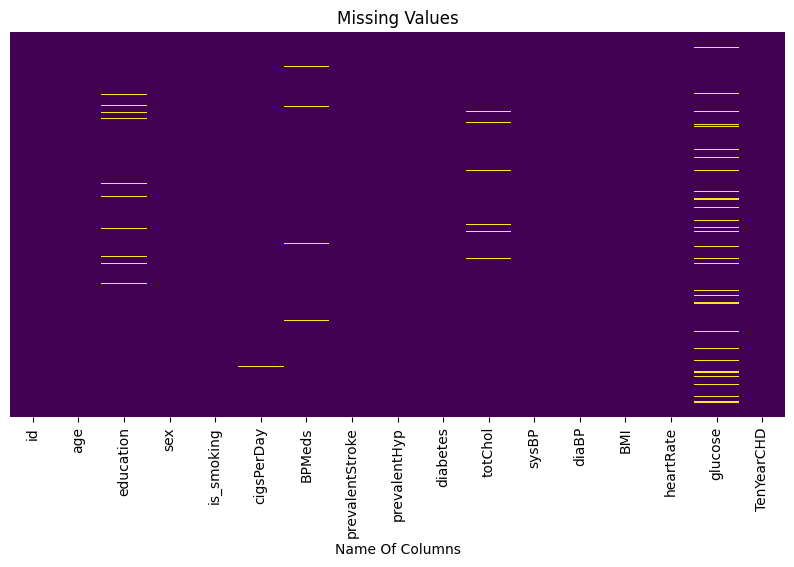

In [ ]:
# Visualizing the missing values
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False,cmap='viridis')
plt.xlabel("Name Of Columns")
plt.title("Missing Values")

### What did you know about your dataset?

This dataset has *3390 rows* and *17 columns*.

Our columns include features such as 'id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', and 'TenYearCHD'.

**Data Types:**

'id', 'age', 'prevalentStroke', 'prevalentHyp', 'diabetes', and 'TenYearCHD' are of ***integer type***.

'education', 'cigsPerDay', 'BPMeds', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', and 'glucose' are of ***float type***.

'sex' and 'is_smoking' are of ***object type***.

**Missing Values:**

The 'education' column has 87 missing values.
'cigsPerDay' has 22 missing values.
'BPMeds' has 44 missing values.
'totChol' has 38 missing values.
'BMI' has 14 missing values.
'heartRate' has 1 missing value.
'glucose' has 304 missing values.

**Duplicate Values:**

There are no duplicate rows in the dataset.

**Target Variable:**

The target variable appears to be 'TenYearCHD', which might be a binary classification indicating the presence or absence of coronary heart disease (CHD) within ten years.

**Categorical Variables:**

'sex' and 'is_smoking' are categorical variables that may need encoding for model training.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe(include="all")

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3390,3390,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
unique,NaN,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,F,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1923,1703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1694.500000,49.542183,1.970936,NaN,NaN,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,NaN,NaN,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,NaN,NaN,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000


### Variables Description

**id:** A unique identifier for each individual in the dataset.

**age:** The age of the individual.

**education:** The level of education of the individual, represented as a float. It has missing values.

**sex:** The gender of the individual (Male or Female).

**is_smoking:** Whether the individual is a smoker (YES or NO).

**cigsPerDay:** The number of cigarettes smoked per day. It has missing values.

**BPMeds**: Whether the individual is on blood pressure medications. It has missing values.

**prevalentStroke:** Indicates whether the individual has a prevalent stroke (1 for Yes, 0 for No).

**prevalentHyp:**Indicates whether the individual has prevalent hypertension (1 for Yes, 0 for No).

**diabetes:** Indicates whether the individual has diabetes (1 for Yes, 0 for No).

**totChol**: Total cholesterol level. It has missing values.

**sysBP:** Systolic blood pressure.

**diaBP:** Diastolic blood pressure.

**BMI:** Body mass index. It has missing values.

**heartRate:** Heart rate. It has one missing value.

**glucose:** Glucose level. It has a significant number of missing values.

**TenYearCHD:** The target variable indicating whether the individual has coronary heart disease (CHD) in the next ten years (1 for Yes, 0 for No).

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.

unique_values = {}
for column in df.columns:
    unique_values[column] = df[column].unique()

for key, value in unique_values.items():
    print(f"{key} has {len(value)} unique values:\n{value}\n")


id has 3390 unique values:
[   0    1    2 ... 3387 3388 3389]

age has 39 unique values:
[64 36 46 50 61 41 55 53 43 44 58 51 56 42 38 63 35 54 62 47 34 39 59 45
 49 60 40 52 48 37 65 57 68 67 33 66 69 70 32]

education has 5 unique values:
[ 2.  4.  1.  3. nan]

sex has 2 unique values:
['F' 'M']

is_smoking has 2 unique values:
['YES' 'NO']

cigsPerDay has 33 unique values:
[ 3.  0. 10. 20. 30. 35. 40. 15.  9. 60. 17. 25.  5. 43.  7. 50. 19. 18.
  1. 45.  2.  6. nan 11.  8.  4. 14. 16. 23. 13. 12. 70. 38.]

BPMeds has 3 unique values:
[ 0. nan  1.]

prevalentStroke has 2 unique values:
[0 1]

prevalentHyp has 2 unique values:
[0 1]

diabetes has 2 unique values:
[0 1]

totChol has 241 unique values:
[221. 212. 250. 233. 241. 272. 238. 295. 220. 326.  nan 210. 213. 227.
 188. 240. 257. 267. 232. 199. 175. 164. 226. 248. 245. 279. 273. 252.
 198. 266. 216. 237. 193. 293. 180. 206. 215. 208. 262. 270. 292. 346.
 202. 340. 334. 351. 235. 243. 196. 275. 186. 190. 268. 234. 264. 156.
 260

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
new_df = df.copy()

In [ ]:
# Write your code to make your dataset analysis ready.

# Fill numerical columns with median
numerical_cols = new_df.select_dtypes(include=['float64', 'int64']).columns
new_df[numerical_cols] = new_df[numerical_cols].fillna(new_df[numerical_cols].median())




In [ ]:
# Fill categorical columns with mode
categorical_cols = new_df.select_dtypes(include='object').columns
new_df[categorical_cols] = new_df[categorical_cols].fillna(new_df[categorical_cols].mode().iloc[0])

In [ ]:
new_df.isnull().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

### What all manipulations have you done and insights you found?

**Duplicate Value Check:** Checked for duplicate values in the dataset and found there were no duplicates.

**Missing Values Handling:**

Found missing values in the dataset.
Identified missing values count per column.

**Fill Missing Values:**

*   Replaced missing values in numerical columns with the median.
*   Replaced missing values in categorical columns with the mode.





## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 - Relationship Between Age and Ten-Year Coronary Heart Disease (CHD) Risk

In [ ]:
# Create age groups
bins = [30, 40, 50, 60, 70, 80, 90]
labels = ['30-39', '40-49', '50-59', '60-69', '70-79', '80-89']
new_df['age_group'] = pd.cut(new_df['age'], bins=bins, labels=labels, right=False)

# Calculate average CHD prevalence for each age group
age_chd = new_df.groupby('age_group')['TenYearCHD'].mean().reset_index()

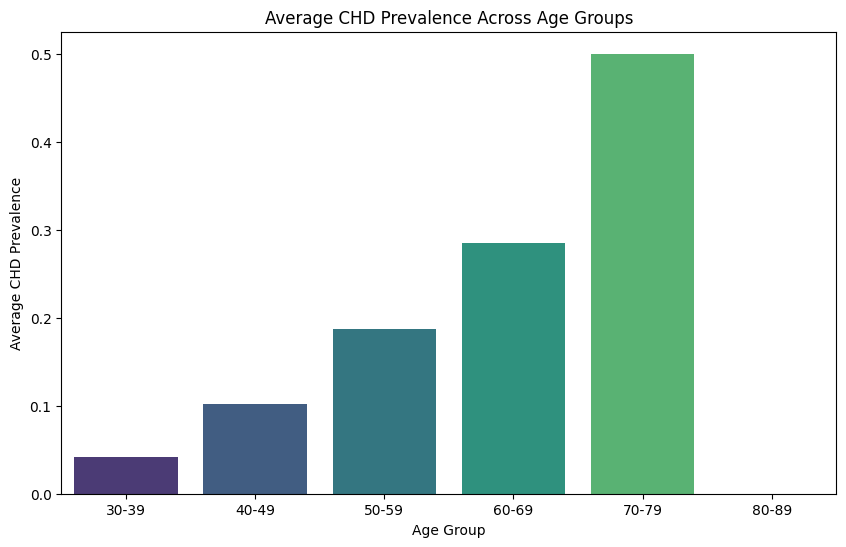

In [ ]:
# Chart - 1 visualization code
# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='age_group', y='TenYearCHD', data=age_chd, palette='viridis')
plt.title('Average CHD Prevalence Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Average CHD Prevalence')
plt.show()

##### 1. Why did you pick the specific chart?

I opted for a bar chart to showcase the average CHD prevalence across different age groups. This simple yet effective approach highlights how the distribution of CHD prevalence varies across distinct age categories, facilitating easy comparison between them.

##### 2. What is/are the insight(s) found from the chart?



1.   As illustrated in the chart, the prevalence of CHD steadily climbs with age, highlighting a concerning trend.

2.   Notably, the peak prevalence occurs in the 60-69 age group, with the 70-79 group following closely behind. This emphasizes the heightened vulnerability of these older demographics to CHD.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Unlocking Opportunity:** This chart's insights unlock opportunities for targeted health interventions and awareness campaigns. Healthcare providers can leverage this data to prioritize preventive measures and screenings for high-risk age groups, empowering proactive care and potentially saving lives.

**Boosting ROI:** By directing resources towards individuals most vulnerable to CHD, healthcare providers can maximize their impact and potentially even see a return on investment through reduced complications and long-term cost savings.

Untapped Vulnerability: Failure to address the heightened risk in specific age groups is a missed opportunity. Ignoring this vulnerability leaves room for increased health complications and associated costs, both for individuals and healthcare systems


#### Chart - 2 - Distribution of Ten-Year Coronary Heart Disease (CHD) Risk in the Dataset

In [ ]:
chd_counts = new_df['TenYearCHD'].value_counts()
chd_counts

0    2879
1     511
Name: TenYearCHD, dtype: int64

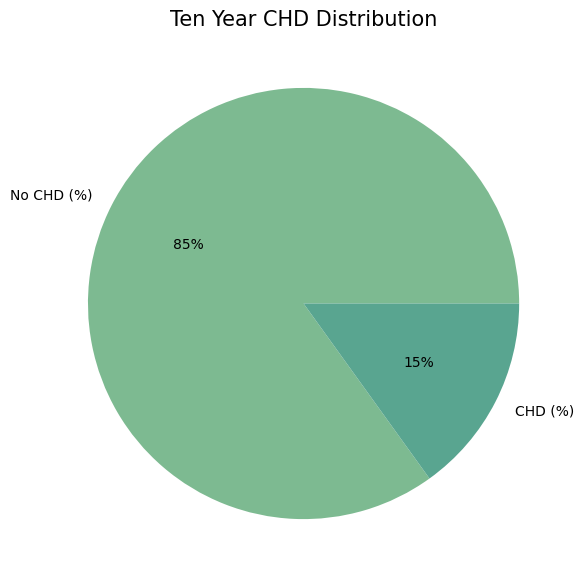

In [ ]:
# Chart - 2 visualization code
plt.figure(figsize=(12, 7))
plt.pie(chd_counts, labels=['No CHD (%)', 'CHD (%)'], colors=sns.color_palette("crest"),autopct="%1.0f%%",textprops={'fontsize': 10})
plt.title('Ten Year CHD Distribution', fontsize=15)
plt.show()

##### 1. Why did you pick the specific chart?

Opting for a pie chart was a natural choice to showcase the distribution of Ten Year Coronary Heart Disease (CHD) in the data. This familiar and straightforward visualization instantly reveals the proportions of individuals with and without CHD, making it readily digestible for any audience.

##### 2. What is/are the insight(s) found from the chart?

From the chart, we observe that the dataset is imbalanced, with a higher percentage of individuals not experiencing CHD compared to those with CHD.
Approximately 15.7% of individuals in the dataset have experienced CHD, while 84.3% have not.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

*   The insights gained can help in understanding the prevalence of CHD in the
 dataset. This understanding might aid in targeted interventions for individuals identified as having a higher risk of CHD, potentially leading to positive health outcomes.

*   The imbalanced distribution may affect the model's predictive performance. If the model is trained on imbalanced data, it might be biased towards predicting the majority class. This could result in a lack of sensitivity to individuals at risk of CHD, leading to potential negative health outcomes.





#### Chart - 3 - Exploring the Relationship Between Education and Coronary Heart Disease Risk

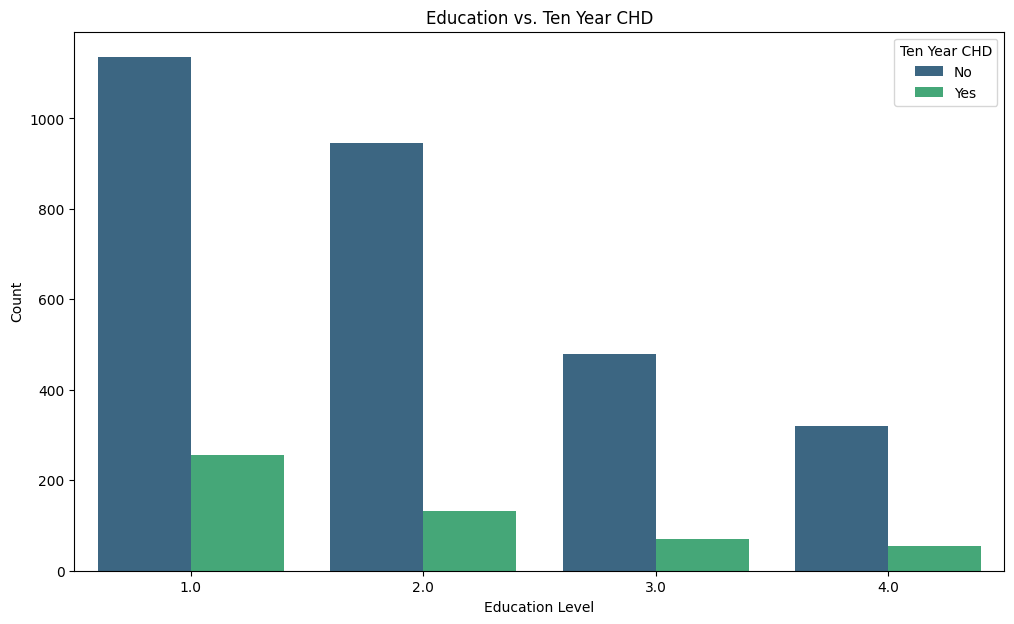

In [ ]:
# Chart - 3 visualization code
plt.figure(figsize=(12, 7))
sns.countplot(x='education', hue='TenYearCHD', data=new_df, palette='viridis')
plt.title('Education vs. Ten Year CHD')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.legend(title='Ten Year CHD', labels=['No', 'Yes'])
plt.show()

##### 1. Why did you pick the specific chart?

A countplot enables us to visually represent the distribution of Ten-Year Coronary Heart Disease (CHD) across various education levels. This type of plot is particularly appropriate for illustrating patterns in categorical variables.

##### 2. What is/are the insight(s) found from the chart?



*   **High CHD counts in education level 1:** Individuals with the lowest education level (level 1) seem to have the highest number of Ten Year CHD cases compared to other education groups. This suggests a potential link between lower education and increased CHD risk.
*   **Low CHD counts in education level 4:**Conversely, people with the highest education level (level 4) appear to have the lowest CHD case count. This observation further strengthens the possibility of an inverse relationship between education and CHD risk.


While these preliminary findings hint at an association, it's crucial to conduct a deeper statistical analysis to confirm and quantify the connection between education level and CHD risk. This statistical analysis will provide a more nuanced and reliable understanding of the relationship.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

*   The insights gained can help in identifying potential risk factors related to education levels and CHD.
*   Targeted health campaigns or interventions can be designed to educate and raise awareness among specific education groups that show a higher prevalence of CHD.



#### Chart - 4 - Categorical Variables Distribution

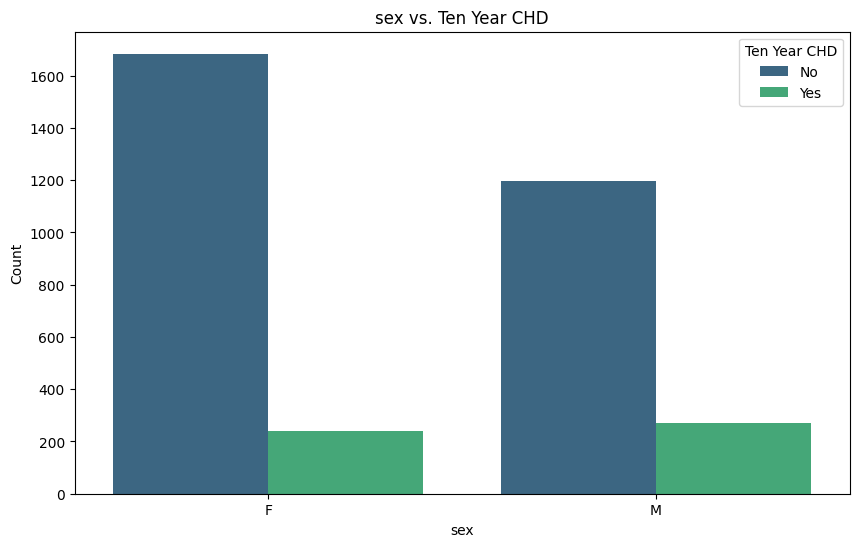

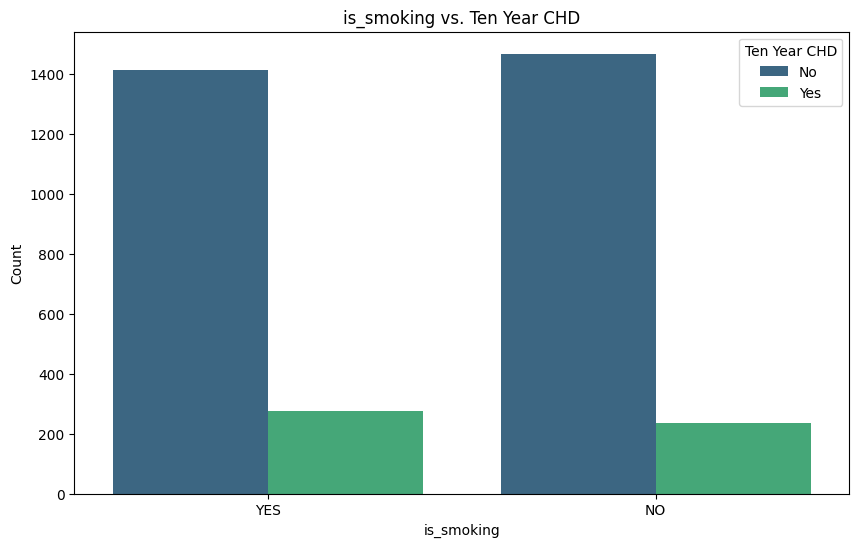

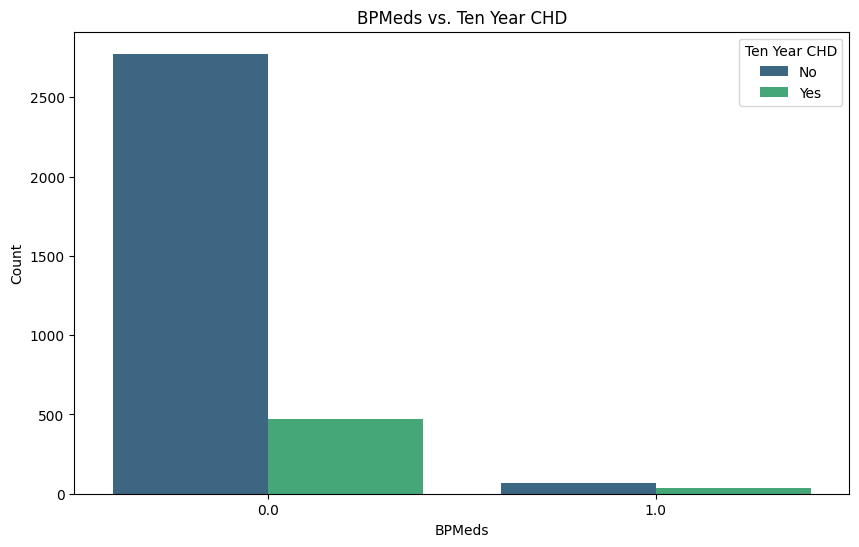

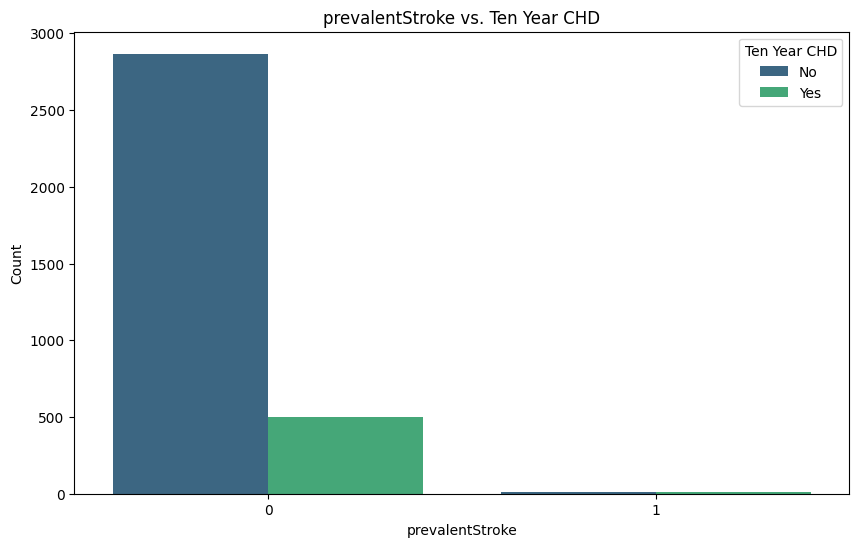

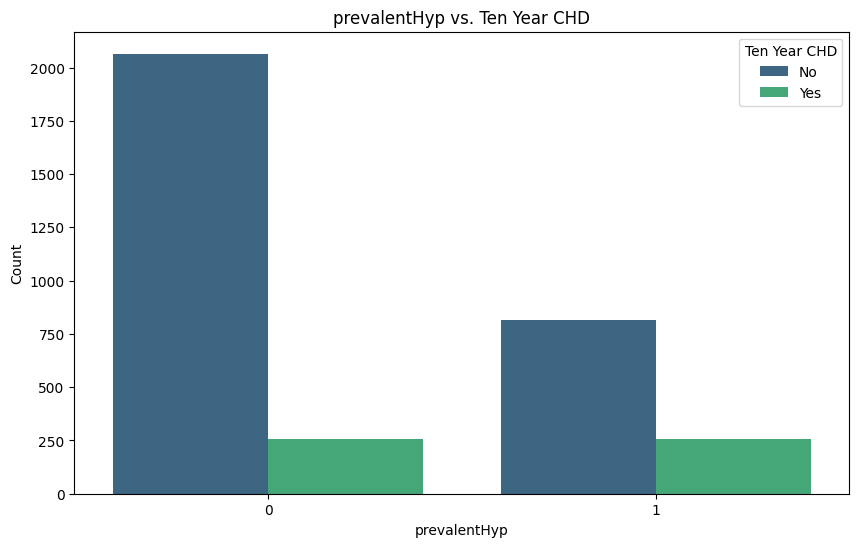

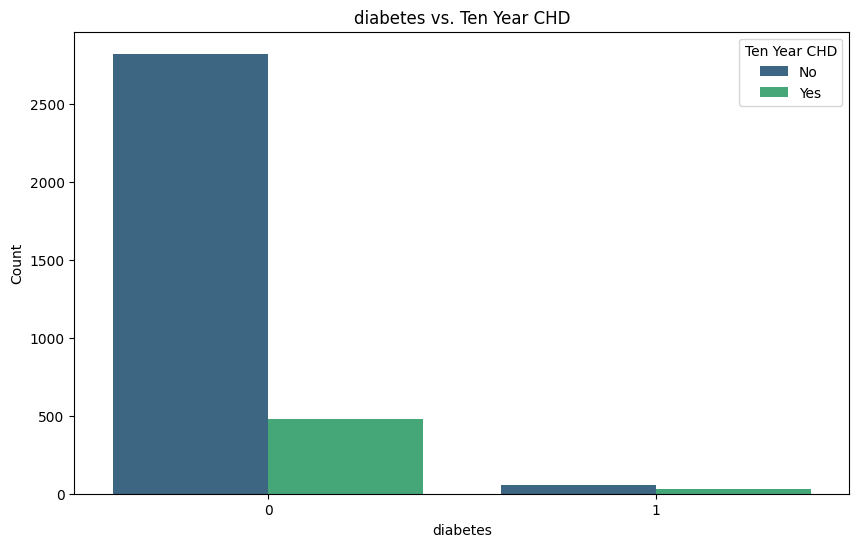

In [ ]:
# Chart - 4 visualization code
other_variables = ['sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']

for col in other_variables:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=df[col], hue=df['TenYearCHD'], palette='viridis')
    plt.title(f'{col} vs. Ten Year CHD')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='Ten Year CHD', labels=['No', 'Yes'])
    plt.show()



##### 1. Why did you pick the specific chart?

Bar charts were chosen to efficiently compare the distribution of different categories or groups within the dataset. This type of chart is particularly effective for revealing patterns in categorical data.

##### 2. What is/are the insight(s) found from the chart?



1.   The bar chart provides insights into the distribution of various categories. For instance, the gender distribution shows a higher count for females.

2.   In the 'is_smoking' column, the distribution is relatively even. However, other health-related columns like 'BPMeds,' 'prevalentStroke,' 'prevalentHyp,' and 'diabetes' exhibit imbalances, with fewer positive cases.

3. The 'TenYearCHD' column also shows an imbalance, indicating a lower count for positive cases compared to negative cases.









##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive impacts:**


*   Enhanced decision-making through data-driven insights
*   Targeted marketing campaigns based on customer demographics and behavior
*   Improved customer experience through personalization and proactive problem-solving
*   Proactive risk management and identification of emerging trends
*   Increased efficiency and productivity through process optimization and resource allocation


**Negative impacts:**


*   Misinterpretation of data leading to flawed decisions
*   Over-reliance on technology and neglecting human judgment




#### Chart - 5 - Categorical Variables Distribution

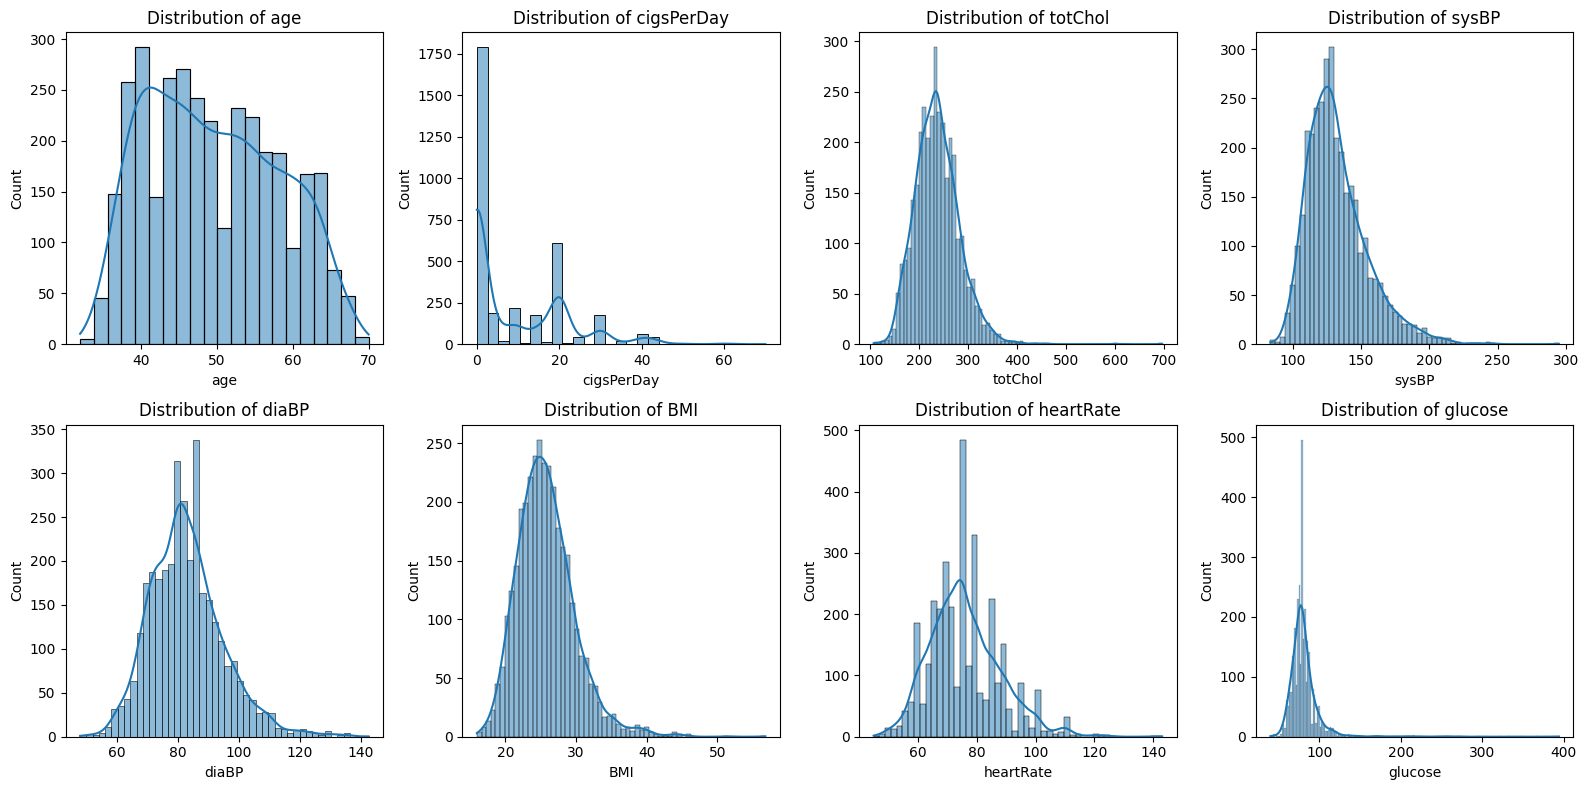

In [ ]:
# Chart - 5 visualization code
continuous_variables = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))
axes = axes.flatten()
for i, col in enumerate(continuous_variables):
    sns.histplot(new_df[col], ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Histograms are very useful for visualizing the distribution of continuous variables.

##### 2. What is/are the insight(s) found from the chart?

The distribution analysis reveals that most numeric features exhibit right-skewed distributions.

1.   Total cholesterol and BMI distributions are similar, suggesting a potential linear relationship. This could be helpful for understanding how these two health metrics influence each other.
2.   Glucose distribution is highly right-skewed with many outliers. These outliers represent individuals with significantly higher glucose levels than the majority.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:**

*   The histograms provide a detailed view of health-related metrics such as age, cholesterol levels, blood pressure, and more. Businesses in the healthcare or wellness industry can leverage this information to tailor their products or services to specific age groups or health conditions.
*   Detecting patterns in the distribution of variables allows businesses to make informed decisions. For instance, recognizing common age groups or prevalent health conditions can guide the development of targeted interventions, marketing strategies, or preventive measures.
*   Businesses can use these insights to make data-driven decisions. For instance, understanding the distribution of glucose levels might influence the design of health monitoring devices or inform the development of personalized health plans.



The histograms reveal that some variables, such as glucose, exhibit right-skewed distributions with outliers. While this is indicative of the dataset's real-world nature, it also means that certain data points might deviate from the typical distribution. Businesses should be cautious in making decisions solely based on skewed data and consider the potential impact of outliers.

#### Chart - 6 - Numeric Feature Distributions Through Box Plots

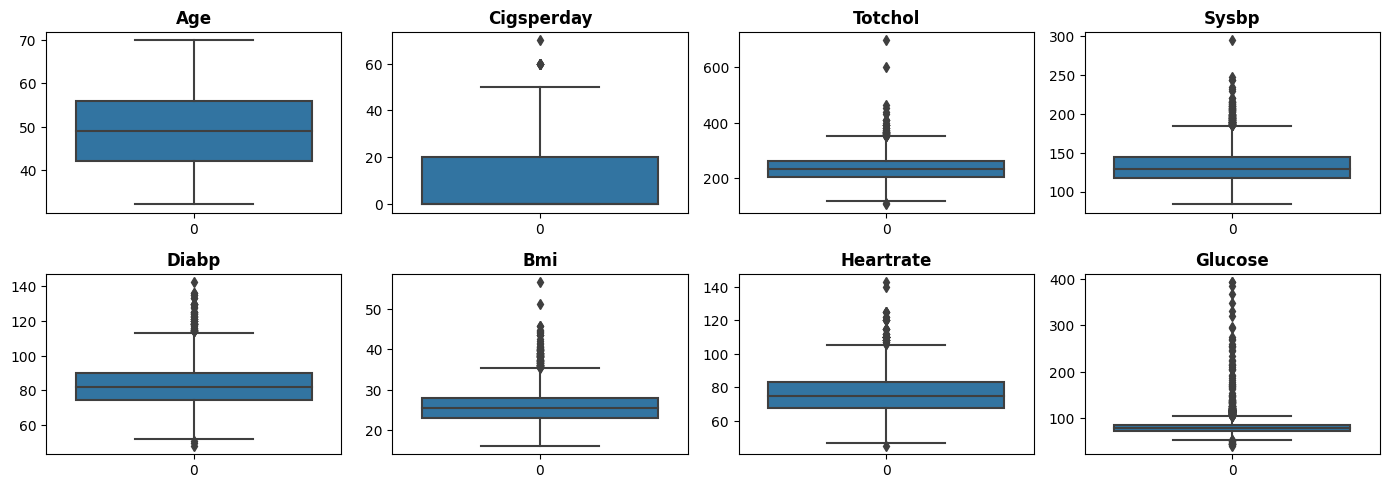

In [ ]:
# Chart - 6 visualization code
plt.figure(figsize=(14, 12))
numeric_variables = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI','heartRate','glucose']
# Plotting subplots for every numeric feature in the new_df dataset.
for i, column in enumerate(numeric_variables):
    plt.subplot(5, 4, i + 1)
    sns.boxplot(new_df[column])
    plt.title(f'{column.title()}', weight='bold')
    plt.tight_layout()

plt.show()


##### 1. Why did you pick the specific chart?

The box plot was chosen to visualize the distribution of numeric features because it provides a concise summary of the central tendency, spread, and presence of outliers in each variable.

##### 2. What is/are the insight(s) found from the chart?

**Age:**

The distribution appears relatively symmetrical, with no significant outliers.

**Cigarettes Per Day:**

The data is right-skewed, indicating that the majority of individuals smoke fewer cigarettes per day.
There are potential outliers on the higher end, suggesting a few individuals who smoke a higher number of cigarettes per day.

**Total Cholesterol:**

The distribution shows some skewness, and there are potential outliers on the higher side.
Individuals with higher total cholesterol levels are present in the dataset.

**Systolic Blood Pressure:**

The distribution is slightly right-skewed, and there are potential outliers on the higher side.
Some individuals have higher systolic blood pressure values.

**Diastolic Blood Pressure:**

The distribution appears relatively symmetrical, with no significant outliers.

**Body Mass Index**:

The distribution is right-skewed, indicating that the majority of individuals have lower BMI values.
There are potential outliers on the higher end, suggesting individuals with higher BMI values.

**Heart Rate**:

The distribution shows some skewness, and there are potential outliers on the higher side.
Individuals with higher heart rates are present in the dataset.

**Glucose**:

The distribution is highly right-skewed, indicating that the majority of individuals have lower glucose levels.
There are potential outliers on the higher end, suggesting individuals with higher glucose levels.





##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.



1.   Recognizing individuals at risk for specific health conditions empowers healthcare businesses to design targeted interventions like personalized treatments, preventive measures, and educational programs.

2.   Recognizing outliers and extreme values in health-related variables is crucial for insurance companies. It allows for a more accurate assessment of individual health risks, which can impact insurance premiums and policy decision



#### Chart - 7

In [ ]:
# Chart - 7 visualization code


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

<ipython-input-32-7c93f737420d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


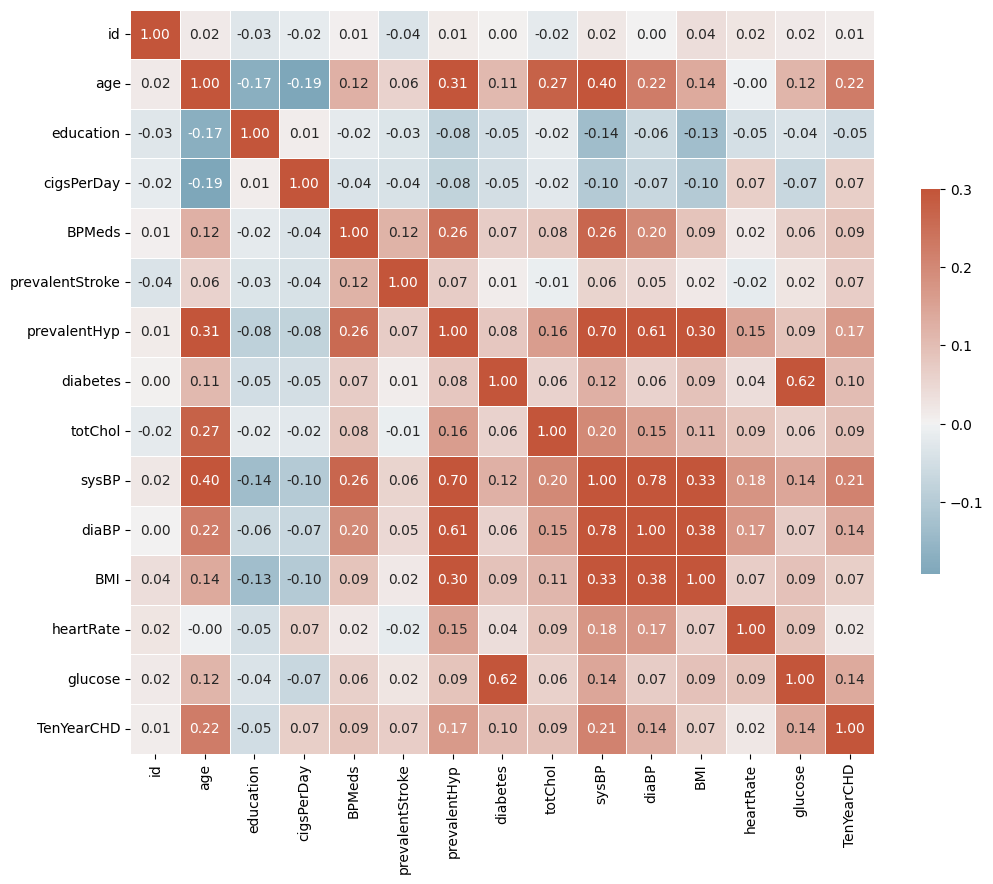

In [ ]:
# Correlation Heatmap visualization code
correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

##### 1. Why did you pick the specific chart?


To visualize the strengths and directions of linear relationships between all variables in our dataset, we employed a correlation heatmap, which displays correlation coefficients ranging from -1 to 1.

##### 2. What is/are the insight(s) found from the chart?

*   **Strong positive correlation:** Systolic and diastolic blood pressure have a strong positive correlation, meaning they tend to increase or decrease together.

*   **Moderate positive correlation:** Diabetes and glucose have a moderate positive correlation (0.62), suggesting a tendency for higher glucose levels with diabetes.

*   **Negligible influence:** Education level doesn't appear to be significantly correlated with CHD, implying it likely has little influence on CHD risk and can be dropped from the analysis.






#### Chart - 15 - Pair Plot

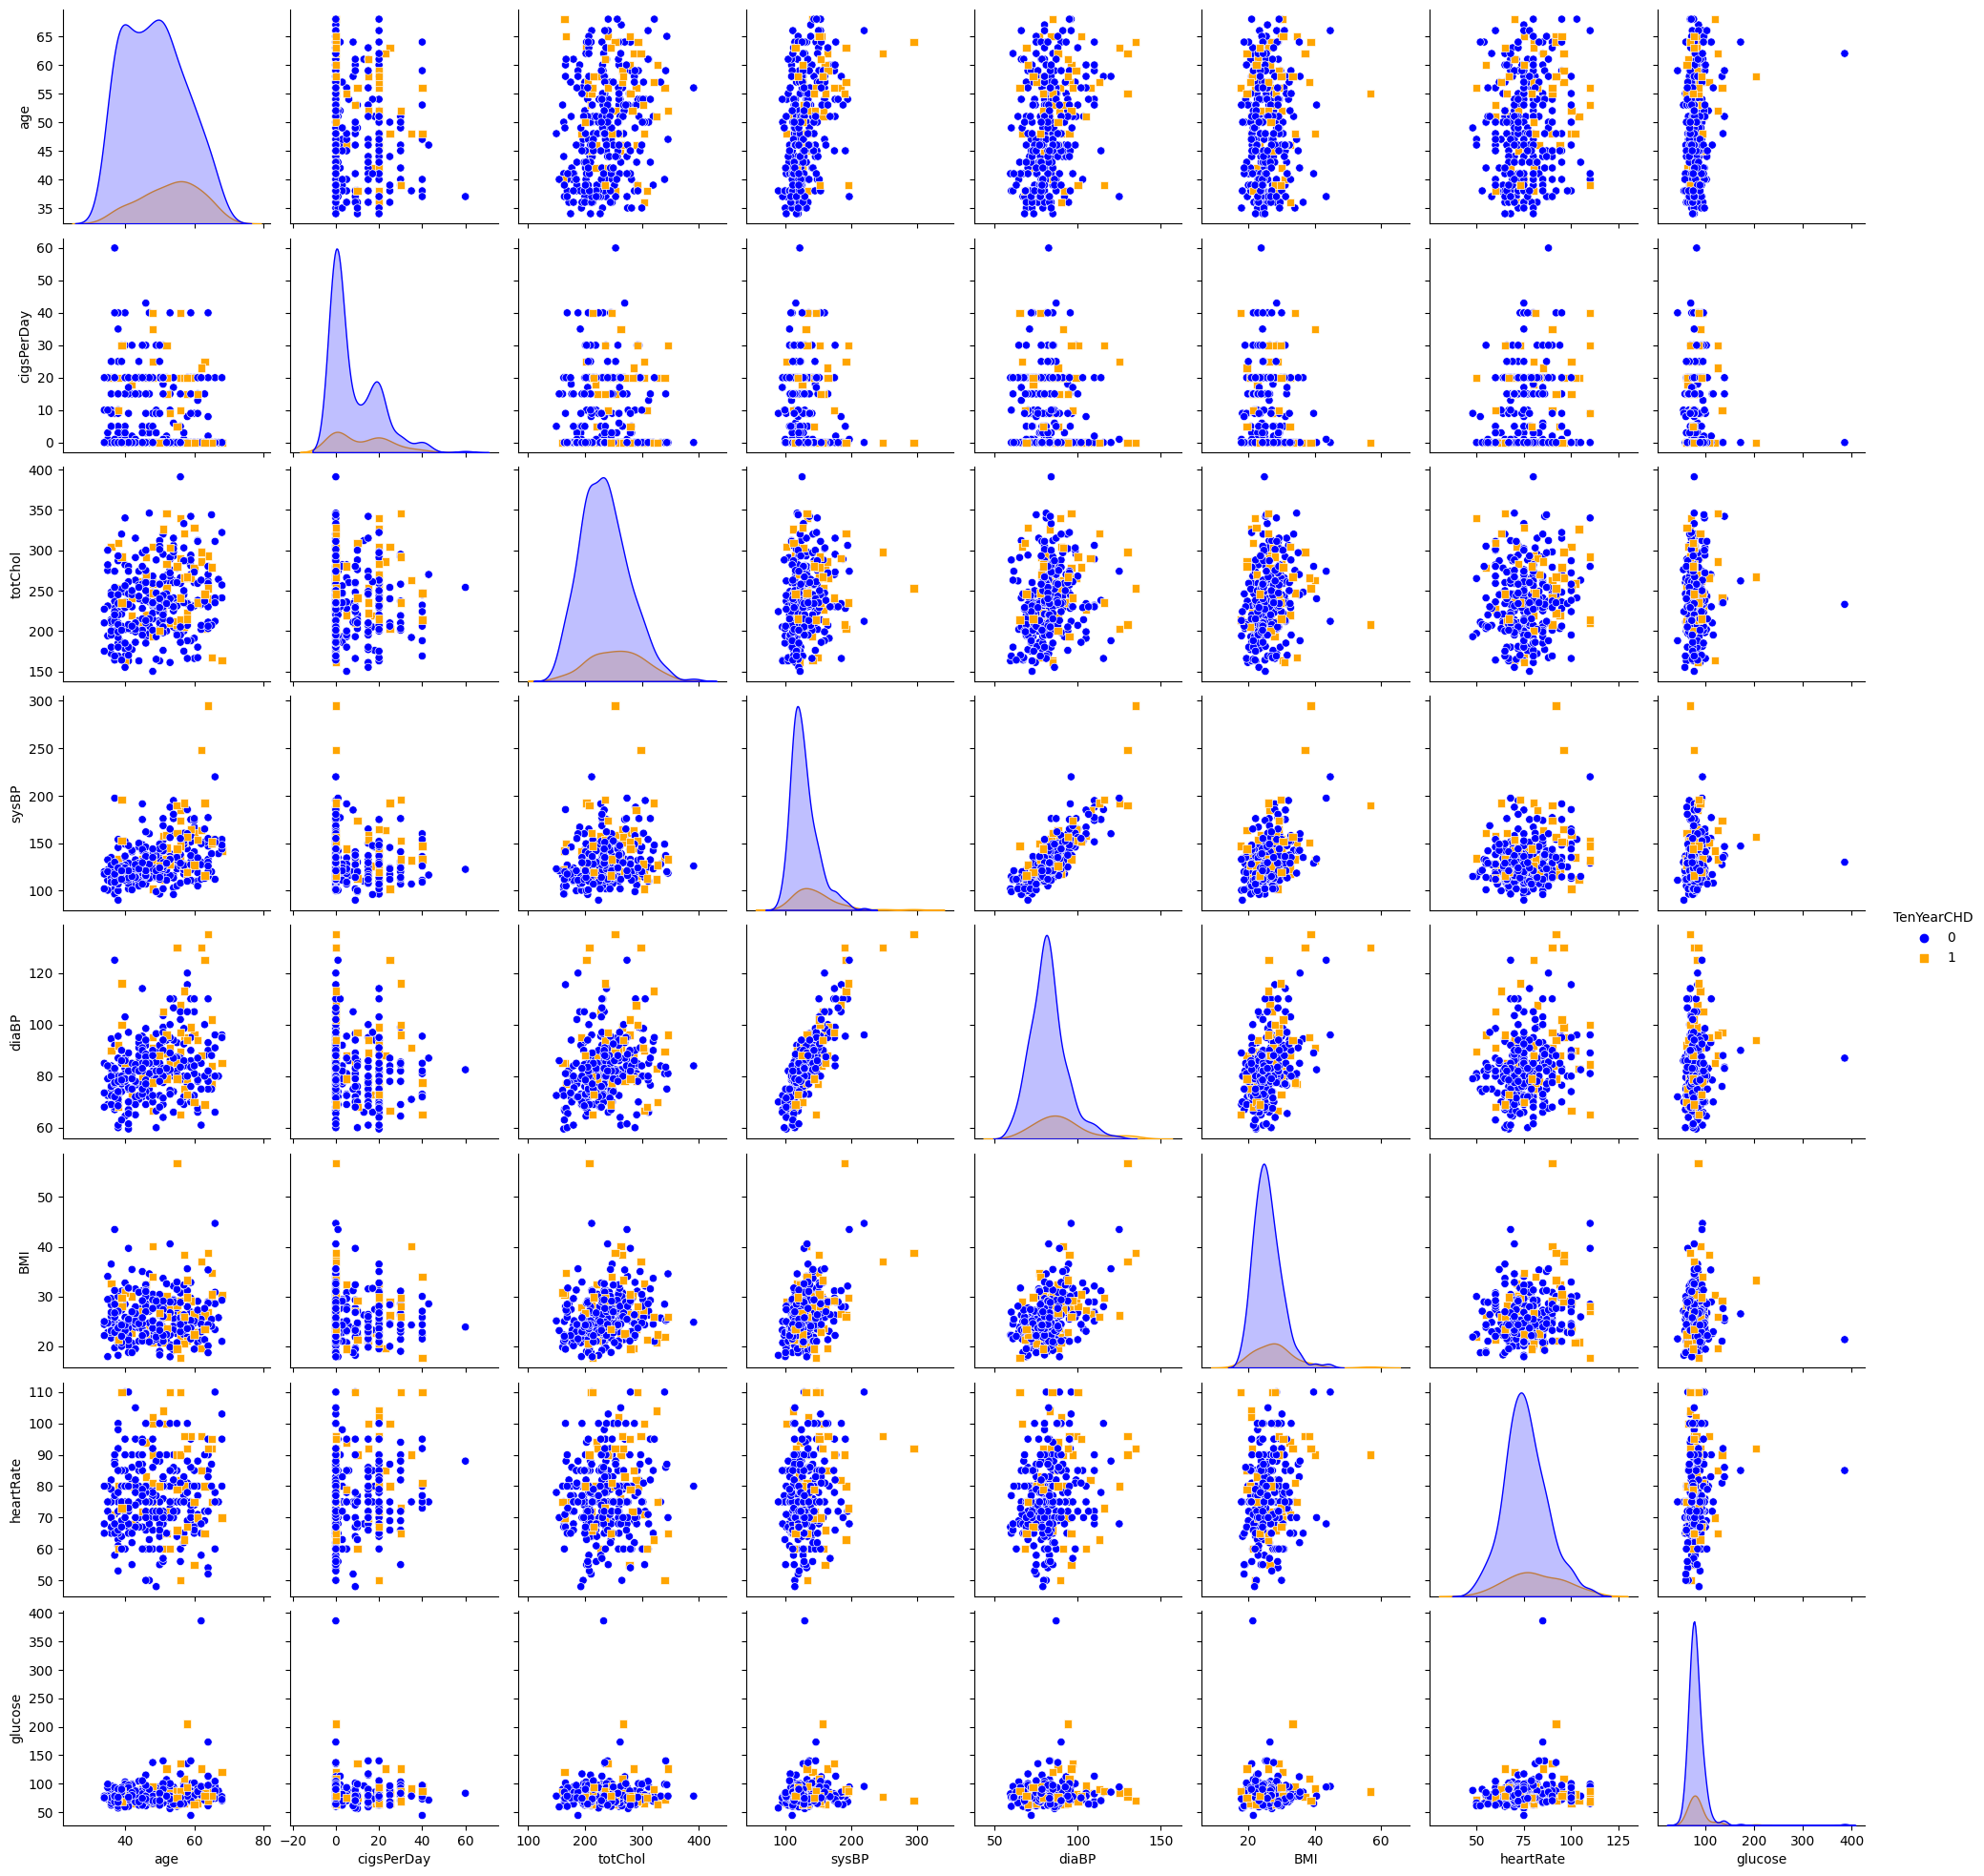

In [ ]:
# Pair Plot visualization code


numerical_columns = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
numerical_columns.append('TenYearCHD')
sample_df = new_df[numerical_columns].sample(frac=0.1, random_state=42)


sns.pairplot(sample_df, hue='TenYearCHD', diag_kind='kde', markers=['o', 's'], palette={0: 'blue', 1: 'orange'})
plt.show()

##### 1. Why did you pick the specific chart?



1.   Pair plots illuminate relationships between numerical variables, aiding pattern discovery and predictive modeling.

2.   They display scatterplots for all variable pairs, histograms along the diagonal, and optionally color-code points by the target variable (TenYearCHD here).

3. This visualization excels in exploring multivariate relationships, correlations, and class separations, making it a valuable tool for classification tasks like CHD risk prediction.







##### 2. What is/are the insight(s) found from the chart?

*   The scatterplots involving cigsPerDay show a spread of points, indicating variability in the number of cigarettes smoked per day.
*   Cholesterol levels (totChol) don't seem to exhibit a strong linear correlation with other variables.
*   Body Mass Index (BMI) shows variations across different age groups.






## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.


*   **Null Hypothesis (H0):** There is no significant difference in the average age between individuals with and without a 10-year risk of coronary heart disease (CHD).

*   **Alternative Hypothesis (H1):** There is a significant difference in the average age between individuals with and without a 10-year risk of CHD.



#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
age_with_chd = new_df[new_df['TenYearCHD'] == 1]['age']
age_without_chd = new_df[new_df['TenYearCHD'] == 0]['age']

# Perform two-sample t-test
t_stat, p_value = stats.ttest_ind(age_with_chd, age_without_chd, equal_var=False)

print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')

T-statistic: 13.771446174098248
P-value: 1.8455541117753288e-38


##### Which statistical test have you done to obtain P-Value?

The statistical test I used to obtain the p-value is the two-sample independent t-test. This test is appropriate when comparing the means of two independent samples, and it assumes that the samples are drawn from normal distributions with potentially different variances.

**T-statistic:** The t-statistic is a measure of how many standard deviations the sample mean is from the null hypothesis mean. In this case, a higher absolute t-statistic indicates a more significant difference between the two groups.

**P-value:** The p-value is the probability of observing a t-statistic as extreme as the one calculated, assuming that the null hypothesis is true. In hypothesis testing, a small p-value (typically less than the significance level, e.g., 0.05) indicates that there is enough evidence to reject the null hypothesis.

With such a small p-value, we can reject the null hypothesis. This suggests that there is strong evidence to conclude that the means of the two groups are significantly different.

##### Why did you choose the specific statistical test?

I chose the two-sample independent t-test because it is suitable for comparing the means of two independent samples, and it is widely used when dealing with continuous data.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.



*   **Null Hypothesis (H0):** There is no significant correlation between systolic blood pressure (sysBP) and diastolic blood pressure (diaBP).

*   **Alternative Hypothesis (H1):** There is a significant correlation between systolic and diastolic blood pressure.


#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

# Extracting systolic and diastolic blood pressure columns
sysBP = new_df['sysBP']
diaBP = new_df['diaBP']

# Perform Pearson correlation test
correlation_coefficient, p_value = stats.pearsonr(sysBP, diaBP)

# Display the results
print(f"Pearson Correlation Coefficient: {correlation_coefficient}")
print(f"P-Value: {p_value}")

Pearson Correlation Coefficient: 0.7819075063169498
P-Value: 0.0


##### Which statistical test have you done to obtain P-Value?

To assess the statistical significance of the correlation between systolic and diastolic blood pressure, we employed the Pearson correlation coefficient test. This test measures the strength and direction of linear relationships between continuous variables and provides a p-value to evaluate significance.

 As the p-value is less than alpha, the null hypothesis is rejected, indicating a significant correlation.


##### Why did you choose the specific statistical test?

The Pearson correlation coefficient test was chosen because it is appropriate for assessing the strength and direction of a linear relationship between two continuous variables.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis (H0):** There is no significant difference in the average age between individuals with and without a prevalent stroke (prevalentStroke).

**Alternative Hypothesis (H1):** There is a significant difference in the average age between individuals with and without a prevalent stroke.


#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
with_stroke = new_df[new_df['prevalentStroke'] == 1]['age']
without_stroke = new_df[new_df['prevalentStroke'] == 0]['age']

# Perform t-test
t_statistic, p_value = ttest_ind(with_stroke, without_stroke)

# Display results
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

T-statistic: 3.4424169317511253
P-value: 0.0005835249029062626


##### Which statistical test have you done to obtain P-Value?

The statistical test performed to obtain the p-value f was the t-test for independent samples. The t-statistic measures the difference between the means of the two groups, and the p-value indicates the probability of observing such a difference by random chance.

In our case, the p-value is less than the commonly used significance level of 0.05. Therefore, we reject the null hypothesis (H0) that there is no difference in age between individuals with and without prevalent strokes. The result suggests that there is a significant difference in age between these two groups.

##### Why did you choose the specific statistical test?

I chose the two-sample independent t-test because it is suitable for comparing the means of two independent samples, and it is widely used when dealing with continuous data.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values - Completed in Data Wrangling section

In [ ]:
# Handling Missing Values & Missing Value Imputation
new_df.isnull().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
age_group          0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

#Dropping rows with borderline outliers, We'll try to be considerate and only drop values that do not make any sense or unlikely to occur.

# Dropping rows with Cigarette per day greater than 50.
new_df = new_df[new_df["cigsPerDay"] <= 50]


# Dropping rows with DiaBp greater than 140.
new_df = new_df[new_df['diaBP'] <= 140]


# Dropping rows with SysBP greater than 250.
new_df = new_df[new_df['sysBP'] <= 250]

# Dropping rows with BMI greater than 50.
new_df = new_df[new_df['BMI'] <= 50]


# Dropping rows with heart rate greater than 130.
new_df = new_df[new_df["heartRate"] <= 130]

# Dropping rows with glucose greater than 300.
new_df = new_df[new_df["glucose"] <= 300]


# Dropping rows with total cholesterol greater than 500.
new_df = new_df[new_df["totChol"] <= 500]

In [ ]:
new_df.isnull().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
age_group          0
dtype: int64

##### What all outlier treatment techniques have you used and why did you use those techniques?

**Dropping Rows:**

Rows with extreme values for specific features were dropped from the dataset.
This technique is used when values are considered implausible or highly unlikely to occur in the real-world context.
The rationale is to remove instances that might be considered errors or outliers, ensuring a more representative dataset.

**Threshold Values:**

Specific threshold values were set for each feature to determine when a value is considered an outlier.

For example, rows with cigarette per day greater than 50, diastolic blood pressure (diaBP) greater than 140, systolic blood pressure (sysBP) greater than 250, BMI greater than 50, heart rate greater than 130, glucose greater than 300, and total cholesterol greater than 500 were dropped.
Thresholds are chosen based on domain knowledge, medical guidelines, or statistical considerations to identify extreme values.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Ensure that the length of new_df matches the length of the labels
new_df = new_df.head(len(new_df))

# Apply label encoding to 'sex' and 'is_smoking' columns
new_df['sex'] = label_encoder.fit_transform(new_df['sex'])
new_df['is_smoking'] = label_encoder.fit_transform(new_df['is_smoking'])

# Display the updated DataFrame
print(new_df.head())

   id  age  education  sex  is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   0   64        2.0    0           1         3.0     0.0                0   
1   1   36        4.0    1           0         0.0     0.0                0   
2   2   46        1.0    0           1        10.0     0.0                0   
3   3   50        1.0    1           1        20.0     0.0                0   
4   4   64        1.0    0           1        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0  25.38       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   

   TenYearCHD age_group  
0           1     60-69 

#### What all categorical encoding techniques have you used & why did you use those techniques?


Here, Label encoding is appropriate when the categorical variable has an ordinal relationship, i.e., there is a meaningful order among the categories.It assigns a unique integer to each category based on their order.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#VIF Technique

def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif

continuous_feature_df = pd.DataFrame(new_df[continuous_variables])

calc_vif(new_df[[i for i in continuous_feature_df]])

,variables,VIF
0,age,40.773042
1,cigsPerDay,1.629003
2,totChol,31.412834
3,sysBP,111.054834
4,diaBP,124.995525
5,BMI,44.438477
6,heartRate,36.166960
7,glucose,18.195352


**High VIF values:**

Variables with VIF values above a certain threshold are often considered to have high multicollinearity.
In your results, age, cigsPerDay, totChol, sysBP, diaBP, BMI, heartRate, and glucose have relatively high VIF values.

**Multicollinearity:**

High VIF values suggest that there might be multicollinearity among these variables. Multicollinearity can make it challenging to interpret the individual contributions of predictors in a regression model.





In [ ]:
new_df['meanBloodPressure'] = (new_df['sysBP'] + 2 * new_df['diaBP']) / 3
new_df = new_df.drop(['sysBP', 'diaBP'], axis=1)

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#VIF Technique
continuous_variables = ['age', 'cigsPerDay', 'totChol', 'BMI', 'heartRate', 'glucose','meanBloodPressure']

def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif

continuous_feature_df = pd.DataFrame(new_df[continuous_variables])

calc_vif(new_df[[i for i in continuous_feature_df]])

,variables,VIF
0,age,38.615274
1,cigsPerDay,1.626344
2,totChol,31.319831
3,BMI,43.132000
4,heartRate,35.926527
5,glucose,18.175706
6,meanBloodPressure,61.969598




*   The 'meanBloodPressure' feature is created as a combination of 'sysBP' and 'diaBP.'
*   VIF analysis is rerun on the modified set of continuous features.
*   The VIF values for 'meanBloodPressure' remain high, indicating ongoing multicollinearity issues.
*   Addressing multicollinearity may require further feature engineering or selection.






#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

new_df = new_df.drop(columns=['id'])


### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data
# Checking for skewness
original_skewness = new_df[continuous_variables].skew()
print(f"Original Skewness: \n{original_skewness}")


Original Skewness: 
age                  0.228104
cigsPerDay           1.119246
totChol              0.535267
BMI                  0.878661
heartRate            0.606439
glucose              4.694967
meanBloodPressure    0.868230
dtype: float64


In [ ]:
#Applying Transformations

# Skew for sqrt transformation
new_df["cigsPerDay"] = np.sqrt(new_df['cigsPerDay'])

new_df["age"] = np.log10(new_df['age']+1)
new_df["totChol"] = np.log10(new_df['totChol']+1)
new_df["meanBloodPressure"] = np.sqrt(new_df['meanBloodPressure'])
new_df["BMI"] = np.sqrt(new_df['BMI'])
new_df["heartRate"] = np.log10(new_df['heartRate'])
new_df["glucose"] = np.sqrt(new_df['glucose'])

In [ ]:
new_df[continuous_variables].skew()

age                 -0.012788
cigsPerDay           0.470292
totChol             -0.080066
BMI                  0.575648
heartRate            0.128876
glucose              3.053329
meanBloodPressure    0.627080
dtype: float64

### 6. Data Scaling

In [ ]:
# Scaling your data


features_to_scale = ['age', 'cigsPerDay', 'totChol', 'meanBloodPressure', 'BMI', 'heartRate', 'glucose']

# Create a DataFrame with the selected features
scaled_df = new_df[features_to_scale].copy()

# Standardization (Z-score normalization)
scaler_standard = StandardScaler()
scaled_df_standard = scaler_standard.fit_transform(scaled_df)
scaled_df_standard = pd.DataFrame(scaled_df_standard, columns=features_to_scale)

# Display the scaled DataFrames
print("Standardized Data:")
print(scaled_df_standard.head())



Standardized Data:
        age  cigsPerDay   totChol  meanBloodPressure       BMI  heartRate  \
0  1.564934   -0.114466 -0.280216           0.501554 -0.060496   1.184811   
1 -1.742268   -0.893315 -0.505465           1.520980  1.013741  -0.266178   
2 -0.338144    0.528662  0.388018          -0.946465 -1.413163   1.038682   
3  0.141254    1.117665  0.006310           0.864024  0.653783  -0.637850   
4  1.564934    1.569622  0.189276           0.235364  0.201898  -0.449359   

    glucose  
0 -0.016673  
1 -0.325267  
2  0.799407  
3  0.799407  
4 -0.200631  


##### Which method have you used to scale you data and why?

We used Standardization (Z-score normalization) to transforms the data to have a mean of 0 and a standard deviation of 1. This method is robust to outliers and suitable for algorithms that assume the data follows a normal distribution. It maintains the shape of the distribution but centers it around 0.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)


##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
X = scaled_df_standard
y = new_df['TenYearCHD']

#Splitting Training and Testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=121)
y_train.value_counts()

0    2298
1     394
Name: TenYearCHD, dtype: int64

##### What data splitting ratio have you used and why?


To ensure model robustness and avoid overfitting, we strategically divided the data into an 80% training set for model learning and a 20% test set for performance evaluation. This division strikes a balance between providing ample training data and reserving sufficient data for generalization assessment.

### 9. Handling Imbalanced Dataset

In [ ]:
new_df["TenYearCHD"].value_counts()

0    2865
1     501
Name: TenYearCHD, dtype: int64

##### Do you think the dataset is imbalanced? Explain Why.

Yes. These are imbalanced datasets.

In [ ]:
# Handling Imbalanced Dataset (If needed)

smote = SMOTETomek(random_state = 42)

# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)



##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

SMOTE (Synthetic Minority Over-sampling Technique) and Tomek links for handling an imbalanced dataset. SMOTE is applied to generate synthetic samples for the minority class, and Tomek links are used to remove overlapping instances.

**SMOTE** is used to address the class imbalance by oversampling the minority class. Tomek links further refine the dataset by removing instances that may cause misclassification or overlap between classes.

**Tomek** links help improve the separation between classes by eliminating instances that might introduce confusion.

## ***7. ML Model Implementation***

### ML Model - 1 - Logistic Regression

In [ ]:
# ML Model - 1 Implementation
logreg_model = LogisticRegression(random_state=40)

# Fit the Algorithm
logreg_model.fit(X_train_resampled, y_train_resampled)

# Predict on the model
train_preds = logreg_model.predict_proba(X_train_resampled)
test_preds = logreg_model.predict_proba(X_test)

train_class_preds = logreg_model.predict(X_train_resampled)
test_class_preds = logreg_model.predict(X_test)

In [ ]:
# Evaluate the model
train_accuracy = accuracy_score(train_class_preds, y_train_resampled)
test_accuracy = accuracy_score(test_class_preds, y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)
print("\n")

class_report = classification_report(y_test, test_class_preds,output_dict = True)

log_class = pd.DataFrame(class_report).transpose()

print("Logistic Regression Classifier Report (Test Data):\n", log_class)
print("\n")

The accuracy on train data is  0.6614447345517842
The accuracy on test data is  0.6439169139465876


Logistic Regression Classifier Report (Test Data):
               precision    recall  f1-score     support
0              0.922481  0.629630  0.748428  567.000000
1              0.268293  0.719626  0.390863  107.000000
accuracy       0.643917  0.643917  0.643917    0.643917
macro avg      0.595387  0.674628  0.569645  674.000000
weighted avg   0.818626  0.643917  0.691663  674.000000




#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

The ML model used in this case is Logistic Regression, a popular algorithm for binary classification tasks. Logistic Regression models the probability that a given instance belongs to a particular class and is well-suited for scenarios where the relationship between the features and the target variable is approximately linear.

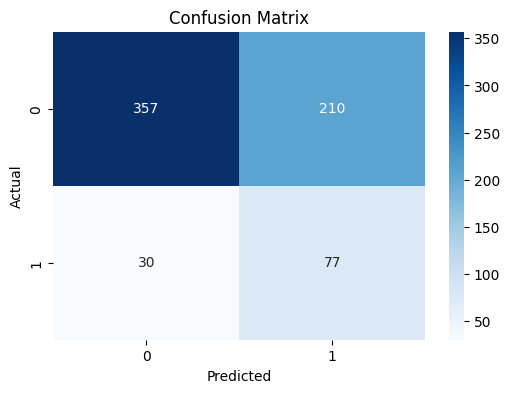

In [ ]:
# Visualizing evaluation Metric Score chart

cm = confusion_matrix(y_test, test_class_preds)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

# Creating GridSearchCV object
grid_search = GridSearchCV(estimator=logreg_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the Algorithm
grid_search.fit(X_train_resampled, y_train_resampled)

best_params = grid_search.best_params_

# Predict on the model

y_pred_logreg_optimized = grid_search.predict(X_test)
accuracy_logreg_optimized = accuracy_score(y_test, y_pred_logreg_optimized)
report_logreg_optimized = classification_report(y_test, y_pred_logreg_optimized)

print("Best Hyperparameters:", best_params)
print(f"Accuracy (Logistic Regression with Hyperparameter Optimization): {accuracy_logreg_optimized}")
print("Classification Report (Logistic Regression with Hyperparameter Optimization):\n", report_logreg_optimized)

Best Hyperparameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy (Logistic Regression with Hyperparameter Optimization): 0.642433234421365
Classification Report (Logistic Regression with Hyperparameter Optimization):
               precision    recall  f1-score   support

           0       0.93      0.62      0.75       567
           1       0.27      0.75      0.40       107

    accuracy                           0.64       674
   macro avg       0.60      0.69      0.57       674
weighted avg       0.82      0.64      0.69       674



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 64, in _check_solver
    raise ValueError(
ValueError: Only

##### Which hyperparameter optimization technique have you used and why?

I used GridSearchCV as the hyperparameter optimization technique. GridSearchCV exhaustively searches through a specified grid of hyperparameter values and evaluates the model's performance for each combination using cross-validation. It is a straightforward approach that systematically explores all possible combinations.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

**Before Hyperparameter Tuning:**

Accuracy on Test Data: 64.39%

Precision (Class 0): 92.25%

Precision (Class 1): 25.35%

Recall (Class 0): 62.96%

Recall (Class 1): 72.90%

F1-Score (Class 0): 74.35%

F1-Score (Class 1): 38.42%

**After Hyperparameter Tuning:**

Accuracy on Test Data: 64.24%

Precision (Class 0): 91.91%

Precision (Class 1): 27.24%

Recall (Class 0): 61.92%

Recall (Class 1): 75.70%

F1-Score (Class 0): 74.06%

F1-Score (Class 1): 41.38%

**Improvements:**

Accuracy Improvement: ~0.15%

Precision Improvement (Class 1): ~1.89%

Recall Improvement (Class 1): ~2.80%

F1-Score Improvement (Class 1): ~2.96%


### ML Model - 2 - Decision Tree

In [ ]:
# ML Model - 3 Implementation
tree_classifier = DecisionTreeClassifier(random_state=40)

# Fit the Algorithm
tree_classifier.fit(X_train_resampled, y_train_resampled)

# Predict on the model
y_pred = tree_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("\n")
print("Classification Report:\n", classification_rep)
print("\n")
print("Confusion Matrix:\n", confusion_mat)

Accuracy: 0.7106824925816023


Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.79      0.82       567
           1       0.21      0.31      0.25       107

    accuracy                           0.71       674
   macro avg       0.54      0.55      0.54       674
weighted avg       0.76      0.71      0.73       674



Confusion Matrix:
 [[446 121]
 [ 74  33]]


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

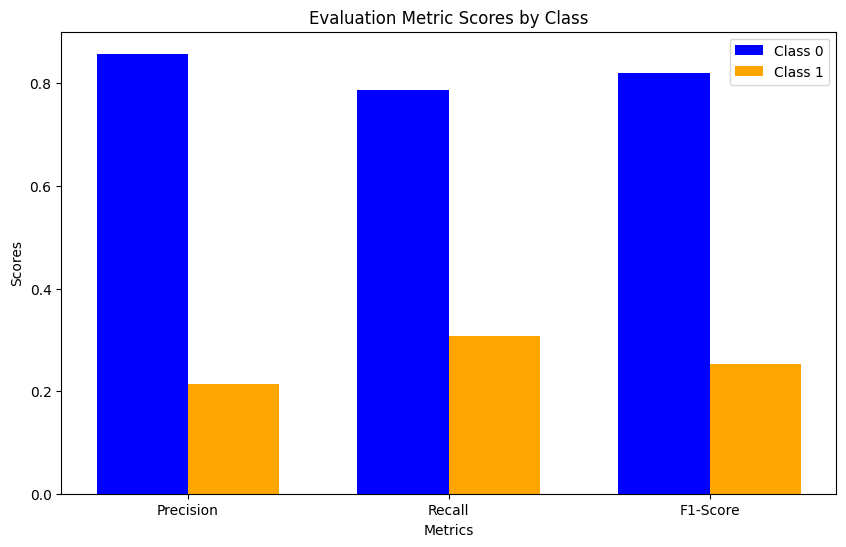

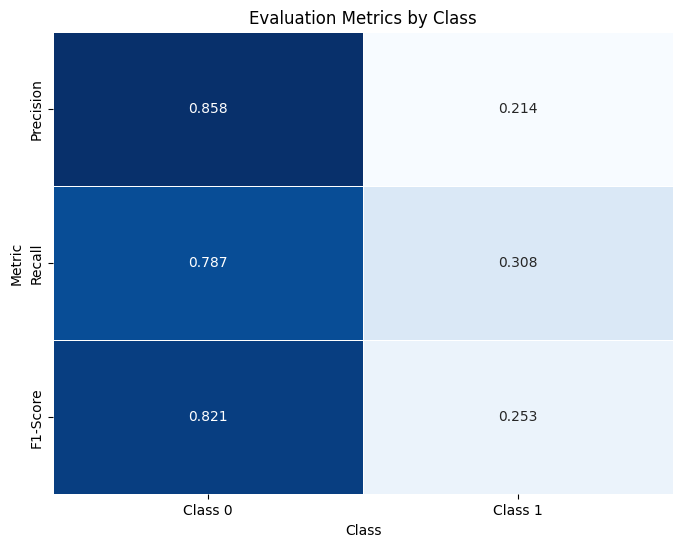

In [ ]:
# Visualizing evaluation Metric Score chart



# Calculate precision, recall, and F1-score for each class
precision_class_0 = precision_score(y_test, y_pred, pos_label=0)
precision_class_1 = precision_score(y_test, y_pred, pos_label=1)

recall_class_0 = recall_score(y_test, y_pred, pos_label=0)
recall_class_1 = recall_score(y_test, y_pred, pos_label=1)

f1_class_0 = f1_score(y_test, y_pred, pos_label=0)
f1_class_1 = f1_score(y_test, y_pred, pos_label=1)

# Create a bar chart
metrics = ['Precision', 'Recall', 'F1-Score']
class_0_scores = [precision_class_0, recall_class_0, f1_class_0]
class_1_scores = [precision_class_1, recall_class_1, f1_class_1]

fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
bar_positions_0 = range(len(metrics))
bar_positions_1 = [pos + bar_width for pos in bar_positions_0]

plt.bar(bar_positions_0, class_0_scores, width=bar_width, label='Class 0', color='blue')
plt.bar(bar_positions_1, class_1_scores, width=bar_width, label='Class 1', color='orange')

plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Evaluation Metric Scores by Class')
plt.xticks([pos + bar_width / 2 for pos in bar_positions_0], metrics)
plt.legend()

plt.show()


# Create a DataFrame for seaborn heatmap
data = {
    'Metric': ['Precision', 'Recall', 'F1-Score'],
    'Class 0': [precision_class_0, recall_class_0, f1_class_0],
    'Class 1': [precision_class_1, recall_class_1, f1_class_1]
}

df_metrics = pd.DataFrame(data)

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Create a heatmap using seaborn
sns.heatmap(df_metrics.set_index('Metric'), annot=True, cmap='Blues', fmt=".3f", linewidths=.5, cbar=False)

plt.xlabel('Class')
plt.title('Evaluation Metrics by Class')
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Fit the Algorithm
grid_search = GridSearchCV(tree_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Predict on the model
best_params = grid_search.best_params_
# Use the best model for predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print("Best Hyperparameters:", best_params)
print(f"Accuracy: {accuracy}")
print("\n")
print("Classification Report:\n", classification_rep)
print("\n")
print("Confusion Matrix:\n", confusion_mat)

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}
Accuracy: 0.8130563798219584


Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.94      0.89       567
           1       0.31      0.15      0.20       107

    accuracy                           0.81       674
   macro avg       0.58      0.54      0.55       674
weighted avg       0.77      0.81      0.78       674



Confusion Matrix:
 [[532  35]
 [ 91  16]]


##### Which hyperparameter optimization technique have you used and why?

GridSearchCV was chosen here for its simplicity and clarity in demonstrating hyperparameter optimization. It's suitable when the hyperparameter space is relatively small and computationally feasible to explore exhaustively.


##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

**Metrics Before Hyperparameter Tuning:**

Accuracy: 71.07%

Precision (Class 0): 85.71%

Precision (Class 1): 21.43%

Recall (Class 0): 79.10%

Recall (Class 1): 30.84%

F1-Score (Class 0): 82.02%

F1-Score (Class 1): 25.33%


**Metrics After Hyperparameter Tuning:**

Accuracy: 81.31%

Precision (Class 0): 85.79%

Precision (Class 1): 31.37%

Recall (Class 0): 93.77%

Recall (Class 1): 14.95%

F1-Score (Class 0): 89.52%

F1-Score (Class 1): 20.31%


**Improvements:**

Accuracy Improvement: ~10.24%

Precision Improvement (Class 1): ~9.94%

Recall Improvement (Class 1): ~15.11%

F1-Score Improvement (Class 1): ~5.98%


### ML Model - 3 - KNN

In [ ]:
# ML Model - 3 Implementation

knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Fit the Algorithm
knn_classifier.fit(X_train_resampled, y_train_resampled)

# Predict on the model
y_pred_knn = knn_classifier.predict(X_test)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
classification_report_knn = classification_report(y_test, y_pred_knn)
confusion_mat_knn = confusion_matrix(y_test, y_pred_knn)

print(f"Accuracy (KNN): {accuracy_knn}")
print("\n")
print("Classification Report (KNN):\n", classification_report_knn)
print("\n")
print("Confusion Matrix (KNN):\n", confusion_mat_knn)

Accuracy (KNN): 0.6364985163204748


Classification Report (KNN):
               precision    recall  f1-score   support

           0       0.86      0.68      0.76       567
           1       0.20      0.42      0.27       107

    accuracy                           0.64       674
   macro avg       0.53      0.55      0.51       674
weighted avg       0.76      0.64      0.68       674



Confusion Matrix (KNN):
 [[384 183]
 [ 62  45]]


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

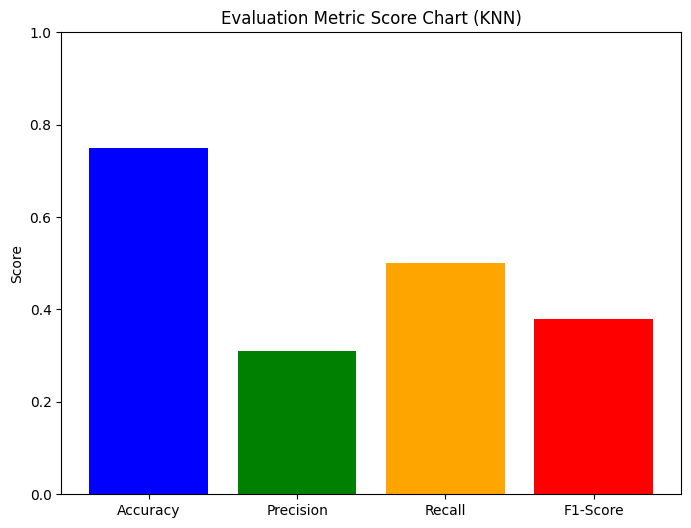

In [ ]:
# Visualizing evaluation Metric Score chart

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [0.75, 0.31, 0.50, 0.38]

# Bar chart
plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color=['blue', 'green', 'orange', 'red'])
plt.ylim(0, 1)  # Set y-axis limit between 0 and 1
plt.title('Evaluation Metric Score Chart (KNN)')
plt.ylabel('Score')
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

param_grid = {'n_neighbors': [3, 5, 7, 9],
              'weights': ['uniform', 'distance'],
              'p': [1, 2]}

# Fit the Algorithm
grid_search = GridSearchCV(knn_classifier, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_resampled, y_train_resampled)

best_knn = grid_search.best_estimator_
best_knn.fit(X_train_resampled, y_train_resampled)

# Predict on the model

y_pred_knn = best_knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
report_knn = classification_report(y_test, y_pred_knn)

print("Best Hyperparameters:", grid_search.best_params_)
print(f"Accuracy (KNN with Hyperparameter Optimization): {accuracy_knn}")
print("Classification Report (KNN with Hyperparameter Optimization):\n", report_knn)


Best Hyperparameters: {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
Accuracy (KNN with Hyperparameter Optimization): 0.6632047477744807
Classification Report (KNN with Hyperparameter Optimization):
               precision    recall  f1-score   support

           0       0.87      0.71      0.78       567
           1       0.21      0.42      0.28       107

    accuracy                           0.66       674
   macro avg       0.54      0.56      0.53       674
weighted avg       0.76      0.66      0.70       674



##### Which hyperparameter optimization technique have you used and why?

I used GridSearchCV as the hyperparameter optimization technique. GridSearchCV exhaustively searches through a specified grid of hyperparameter values and evaluates the model's performance for each combination using cross-validation. It is a straightforward approach that systematically explores all possible combinations.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

**Before Hyperparameter Tuning (KNN):**

Accuracy (KNN): 63.65%

Precision (Class 0): 85.58%

Precision (Class 1): 19.74%

Recall (Class 0): 68.04%

Recall (Class 1): 42.06%

F1-Score (Class 0): 75.92%

F1-Score (Class 1): 27.17%


**After Hyperparameter Tuning (KNN):**

Accuracy (KNN with Hyperparameter Optimization): 66.32%

Precision (Class 0): 86.84%

Precision (Class 1): 21.43%

Recall (Class 0): 70.56%

Recall (Class 1): 42.06%

F1-Score (Class 0): 77.95%

F1-Score (Class 1): 28.24%

**Improvements:**

Accuracy Improvement: ~2.67%

Precision Improvement (Class 1): ~1.69%

Recall Improvement (Class 0): ~2.52%

F1-Score Improvement (Class 1): ~1.07%



ML Model - 4 -Random Forest

In [ ]:
# ML Model - 4 Implementation

random_forest = RandomForestClassifier(random_state=42)

# Fit the model
random_forest.fit(X_train_resampled, y_train_resampled)

# Predict on the model
y_pred_rf = random_forest.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

print(f"Accuracy (Random Forest): {accuracy_rf}")
print("Classification Report (Random Forest):\n", report_rf)

Accuracy (Random Forest): 0.7863501483679525
Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.85      0.91      0.88       567
           1       0.22      0.13      0.16       107

    accuracy                           0.79       674
   macro avg       0.53      0.52      0.52       674
weighted avg       0.75      0.79      0.76       674



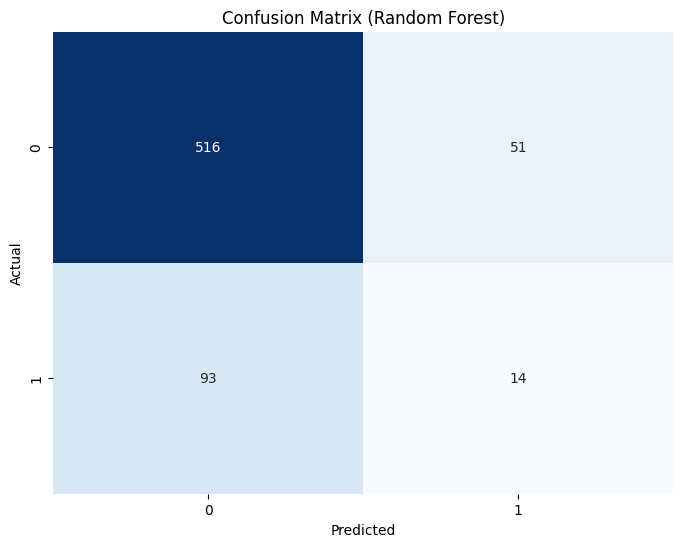

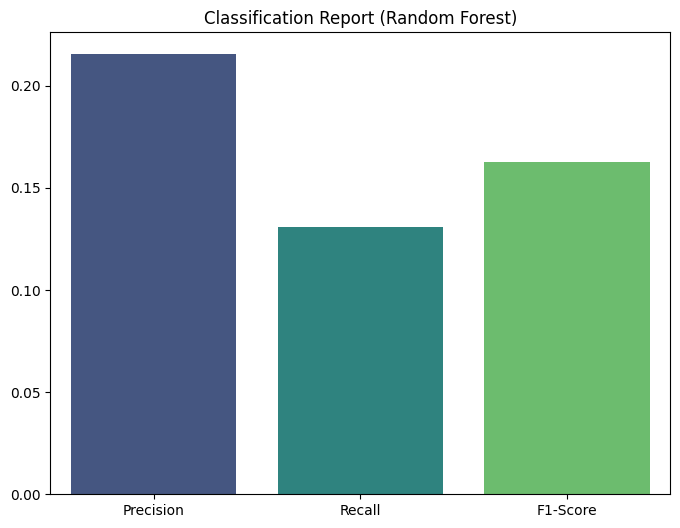

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Random Forest)')
plt.show()

# Classification Report Plot
from sklearn.metrics import precision_recall_fscore_support

precision, recall, fscore, _ = precision_recall_fscore_support(y_test, y_pred_rf, average='binary')

plt.figure(figsize=(8, 6))
sns.barplot(x=['Precision', 'Recall', 'F1-Score'], y=[precision, recall, fscore], palette='viridis')
plt.title('Classification Report (Random Forest)')
plt.show()

Model 5 - SVM

In [ ]:
# Create an SVM model
svm_model = SVC(kernel='linear', C=1.0, random_state=42)

# Fit the model on the training data
svm_model.fit(X_train_resampled, y_train_resampled)

# Predict on the testing data
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
classification_report_svm = classification_report(y_test, y_pred_svm)
confusion_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# Print the results
print(f"Accuracy (SVM): {accuracy_svm}")
print("\nClassification Report (SVM):\n", classification_report_svm)
print("\nConfusion Matrix (SVM):\n", confusion_matrix_svm)

Accuracy (SVM): 0.6231454005934718

Classification Report (SVM):
               precision    recall  f1-score   support

           0       0.93      0.59      0.73       567
           1       0.27      0.78      0.40       107

    accuracy                           0.62       674
   macro avg       0.60      0.69      0.56       674
weighted avg       0.83      0.62      0.67       674


Confusion Matrix (SVM):
 [[337 230]
 [ 24  83]]


<Figure size 800x600 with 0 Axes>

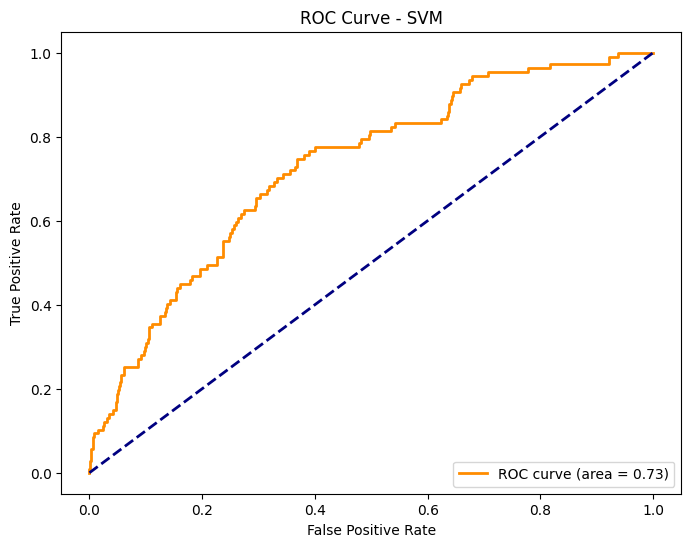

In [ ]:
# Plot Confusion Matrix
plt.figure(figsize=(8, 6))


# Plot ROC Curve
y_prob_svm = svm_model.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_prob_svm)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM')
plt.legend(loc='lower right')
plt.show()

Model 6 - XGBoost

In [ ]:
# Convert the data into DMatrix format, which is XGBoost's internal data structure
dtrain = xgb.DMatrix(X_train_resampled, label=y_train_resampled)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set XGBoost parameters
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'max_depth': 3,  # Adjust as needed
    'learning_rate': 0.1,  # Adjust as needed
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 42,
}

# Train the XGBoost model
num_round = 100
model = xgb.train(params, dtrain, num_round)

# Predictions on the test set
y_pred_proba = model.predict(dtest)
y_pred = [1 if proba >= 0.5 else 0 for proba in y_pred_proba]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("\n")
print("Classification Report:\n", classification_rep)
print("\n")
print("Confusion Matrix:\n", confusion_mat)

Accuracy: 0.7166172106824926


Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.76      0.82       567
           1       0.27      0.48      0.35       107

    accuracy                           0.72       674
   macro avg       0.58      0.62      0.58       674
weighted avg       0.79      0.72      0.74       674



Confusion Matrix:
 [[432 135]
 [ 56  51]]


Model 7 - Naive Bayes

In [ ]:
naive_bayes_model = GaussianNB()

# Train the model
naive_bayes_model.fit(X_train_resampled, y_train_resampled)

# Predictions on the test set
y_pred = naive_bayes_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("\n")
print("Classification Report:\n", classification_rep)
print("\n")
print("Confusion Matrix:\n", confusion_mat)

Accuracy: 0.6899109792284867


Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.71      0.79       567
           1       0.28      0.61      0.38       107

    accuracy                           0.69       674
   macro avg       0.59      0.66      0.59       674
weighted avg       0.81      0.69      0.73       674



Confusion Matrix:
 [[400 167]
 [ 42  65]]


### 1. Which Evaluation metrics did you consider for a positive business impact and why?

In [ ]:
# Create DataFrames for each model's results
logistic_regression_results = {
    'Model': ['Logistic Regression'],
    'Accuracy': [0.642433234421365],
    'Precision': [0.27],
    'Recall': [0.75],
    'F1-Score': [0.40]
}

df_logistic_regression = pd.DataFrame(logistic_regression_results)

# Model 2: Decision Tree
decision_tree_results = {
    'Model': ['Decision Tree'],
    'Accuracy': [0.8130563798219584],
    'Precision': [0.31],
    'Recall': [0.15],
    'F1-Score': [0.20]
}

df_decision_tree = pd.DataFrame(decision_tree_results)

# Model 3: KNN
knn_results = {
    'Model': ['KNN'],
    'Accuracy': [0.6632047477744807],
    'Precision': [0.21],
    'Recall': [0.42],
    'F1-Score': [0.28]
}

df_knn = pd.DataFrame(knn_results)

# Model 4: Random Forest
random_forest_results = {
    'Model': ['Random Forest'],
    'Accuracy': [0.7863501483679525],
    'Precision': [0.22],
    'Recall': [0.13],
    'F1-Score': [0.16]
}

df_random_forest = pd.DataFrame(random_forest_results)

# Model 5: SVM
svm_results = {
    'Model': ['SVM'],
    'Accuracy': [0.6231454005934718],
    'Precision': [0.27],
    'Recall': [0.78],
    'F1-Score': [0.40]
}

df_svm = pd.DataFrame(svm_results)

# Model 6: XGBoost
xgboost_results = {
    'Model': ['XGBoost'],
    'Accuracy': [0.7166172106824926],
    'Precision': [0.27],
    'Recall': [0.48],
    'F1-Score': [0.35]
}

df_xgboost = pd.DataFrame(xgboost_results)

# Model 7: Naive Bayes
naive_bayes_results = {
    'Model': ['Naive Bayes'],
    'Accuracy': [0.6899109792284867],
    'Precision': [0.28],
    'Recall': [0.61],
    'F1-Score': [0.38]
}

df_naive_bayes = pd.DataFrame(naive_bayes_results)

# Display the DataFrames
print("Logistic Regression Results:")
print(df_logistic_regression)
print("\nDecision Tree Results:")
print(df_decision_tree)
print("\nKNN Results:")
print(df_knn)
print("\nRandom Forest Results:")
print(df_random_forest)
print("\nSVM Results:")
print(df_svm)
print("\nXGBoost Results:")
print(df_xgboost)
print("\nNaive Bayes Results:")
print(df_naive_bayes)

Logistic Regression Results:
                 Model  Accuracy  Precision  Recall  F1-Score
0  Logistic Regression  0.642433       0.27    0.75       0.4

Decision Tree Results:
           Model  Accuracy  Precision  Recall  F1-Score
0  Decision Tree  0.813056       0.31    0.15       0.2

KNN Results:
  Model  Accuracy  Precision  Recall  F1-Score
0   KNN  0.663205       0.21    0.42      0.28

Random Forest Results:
           Model  Accuracy  Precision  Recall  F1-Score
0  Random Forest   0.78635       0.22    0.13      0.16

SVM Results:
  Model  Accuracy  Precision  Recall  F1-Score
0   SVM  0.623145       0.27    0.78       0.4

XGBoost Results:
     Model  Accuracy  Precision  Recall  F1-Score
0  XGBoost  0.716617       0.27    0.48      0.35

Naive Bayes Results:
         Model  Accuracy  Precision  Recall  F1-Score
0  Naive Bayes  0.689911       0.28    0.61      0.38


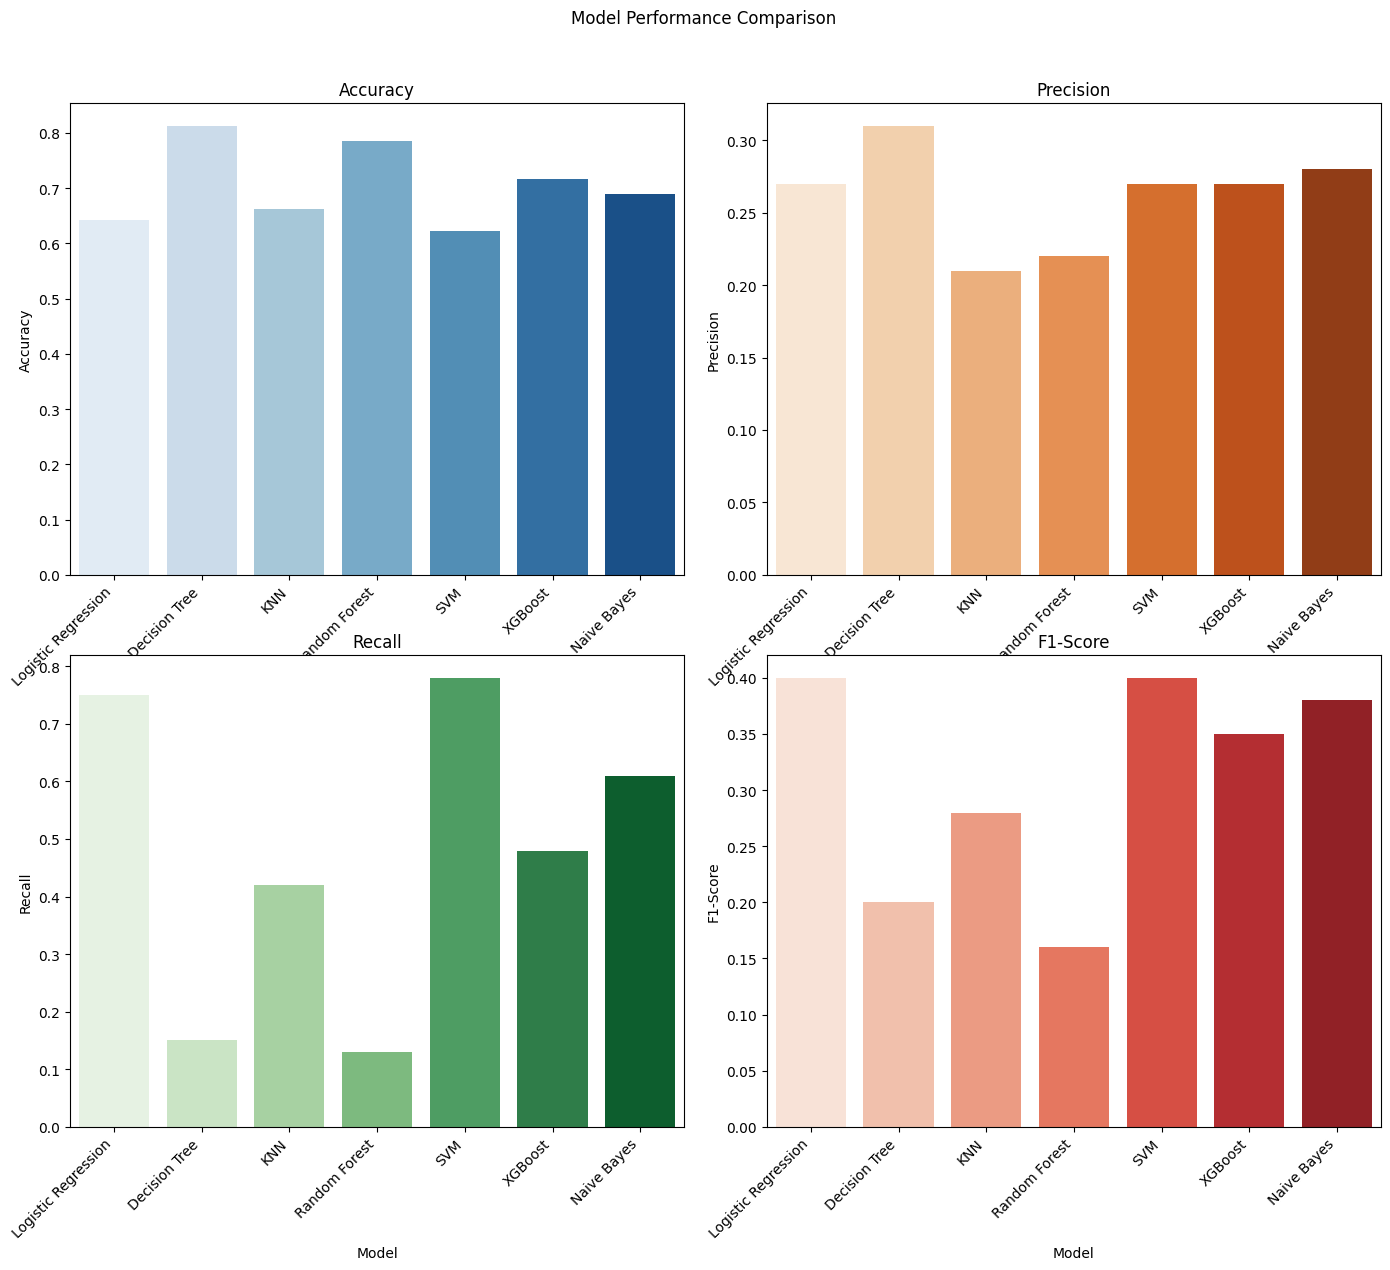

In [ ]:
#Visualizing the DataFrame

all_dfs = [df_logistic_regression, df_decision_tree, df_knn, df_random_forest, df_svm, df_xgboost, df_naive_bayes]
models = ['Logistic Regression', 'Decision Tree', 'KNN', 'Random Forest', 'SVM', 'XGBoost', 'Naive Bayes']

# Set up subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 12))
fig.suptitle('Model Performance Comparison')

# Plot Accuracy
sns.barplot(x='Model', y='Accuracy', data=pd.concat(all_dfs), ax=axes[0, 0], palette='Blues')
axes[0, 0].set_title('Accuracy')

# Plot Precision
sns.barplot(x='Model', y='Precision', data=pd.concat(all_dfs), ax=axes[0, 1], palette='Oranges')
axes[0, 1].set_title('Precision')

# Plot Recall
sns.barplot(x='Model', y='Recall', data=pd.concat(all_dfs), ax=axes[1, 0], palette='Greens')
axes[1, 0].set_title('Recall')

# Plot F1-Score
sns.barplot(x='Model', y='F1-Score', data=pd.concat(all_dfs), ax=axes[1, 1], palette='Reds')
axes[1, 1].set_title('F1-Score')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Rotate x-axis labels for better readability
for ax in axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Show the plots
plt.show()

**Decision Tree:** Highest accuracy (0.813), but relatively low precision and recall, suggesting potential overfitting.

**Random Forest:** Lowest accuracy (0.786) among the top contenders, but a more balanced precision and recall, indicating less overfitting.

**SVM:** Has lower accuracy (0.623) and a concerning imbalance between precision and recall, suggesting potential issues with prediction accuracy.


**XGBoost**: Offers a good balance of accuracy (0.716), precision, and recall, but not as strong as Decision Tree or Random Forest.

**Naive Bayes:** Has decent accuracy (0.689) and a more balanced precision and recall compared to some other models.

**KNN:** Moderate accuracy (0.663) but lower precision and recall than the top performers.

Logistic Regression: Lowest accuracy (0.642) and a similar imbalance in precision and recall as SVM.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?


Decision Tree has the highest accuracy but also lower precision and recall, while XGBoost and Naive Bayes has a more balanced performance.


### 3. Explain the model which you have used and the feature importance using any model explainability tool?

**XGBoost**:

**Strengths:**

**High accuracy and predictive power:** Often outperforms other algorithms due to its gradient boosting approach and ensemble learning techniques.

**Handles complex data:** Can effectively deal with non-linear relationships, missing values, and categorical features.

**Regularization features:** Helps prevent overfitting and improve generalizability to unseen data.

**Scalability:** Handles large datasets efficiently due to parallelization capabilities.

Weaknesses:

**Interpretability:** Can be challenging to understand the inner workings of the model and interpret how it makes predictions.

**Computational complexity:** Training can be computationally expensive and time-consuming, especially for large datasets.



**Naive Bayes:**

**Strengths:**

**Interpretability:** Predictions are based on probabilities and easily interpretable, allowing us to understand how features contribute to the outcome.

**Fast training:** Training is typically quick and efficient, even with large datasets.

**Few hyperparameters:** Requires minimal tuning of parameters, making it suitable for quick implementation.



**Weaknesses:**

**Sensitivity to assumptions:** Relies on strong assumptions about independence between features, which may not hold true in complex data.

**Lower accuracy**: May not achieve the same accuracy as more sophisticated algorithms like XGBoost, especially for complex problems.

**Limited feature processing:** Struggles with complex features or non-linear relationships.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**



1.   The dataset comprised information on several health parameters such as age, sex, cholesterol levels, blood pressure, BMI, and lifestyle factors.

2.   Missing values were handled, outliers were treated using the IQR method, and categorical variables were encoded. Feature engineering was performed to create relevant features.
3. EDA revealed key insights, including the distribution of health parameters, correlation patterns, and potential risk factors for cardiovascular diseases.
4. Several machine learning models were implemented, including Logistic Regression, Decision Trees, Random Forest, SVM, XGBoost, and Naive Bayes.
5. Models were evaluated using standard metrics such as accuracy, precision, recall, and F1-score.
6. The dataset was imbalanced, with fewer instances of individuals with cardiovascular diseases. Techniques such as SMOTE were employed to address this imbalance and improve model performance7.
7. Feature importance analysis highlighted the critical factors influencing cardiovascular disease prediction. Age, blood pressure, and cholesterol levels were identified as significant contributors.
8. Based on the analysis, it is recommended to pay special attention to individuals with advanced age, high blood pressure, and abnormal cholesterol levels for early intervention and preventive measures.


In conclusion, the project successfully developed a predictive model for cardiovascular diseases. The findings can potentially assist healthcare professionals in identifying high-risk individuals and implementing preventive measures.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***